# Analysing results of all models
This notebook analyses the results of the DeepConvNet and Microstate models on the EEG data.
It visualizes the test accuracies across different subjects and study types.
Compares the performance of the models and provides insights into their effectiveness.
And verifies statistical significance of the results.


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="darkgrid")

# change directory go into Notebooks folder
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from lib import my_functions as mf
from lib import my_models as mm
from lib import my_stats_functions as msf

# Set pandas display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

## Loading all data

In [2]:
df_info = pd.read_csv('../Data/data_info.csv')
df_info.head()

subject  n_trials  n_open  n_rest  n_close
0        0       400     100     200      100
1        1       340      85     170       85
2        2       340      85     170       85
3        3       340      85     170       85
4        4       380      95     190       95

In [3]:
output_path = '../Output/ica_rest_all/'

print("🚀 Starting model results extraction...")
df, extracted_results = msf.run_complete_extraction(output_path)

🚀 Starting model results extraction...
🚀 Starting complete model results extraction...
📂 Reading from: ../Output/ica_rest_all/
💾 Results will be saved to: ../Output/ica_rest_all/results_all
🔍 Starting extraction from: ../Output/ica_rest_all/
📊 Configuration:
   Subject types: ['dependent', 'independent', 'adaptive']
   Cluster sizes: [5, 12]
   K-folds: 4
   dependent: 9 models
      ['dcn', 'msn', 'msn_embedded', 'multiscale_msn', 'multiscale_msn_embedded', 'dsn_msn', 'dsn_msn_embedded', 'dsn_multiscale_msn', 'dsn_multiscale_msn_embedded']
   independent: 5 models
      ['dcn', 'msn_embedded', 'multiscale_msn_embedded', 'dsn_msn_embedded', 'dsn_multiscale_msn_embedded']
   adaptive: 5 models
      ['dcn', 'msn_embedded', 'multiscale_msn_embedded', 'dsn_msn_embedded', 'dsn_multiscale_msn_embedded']

📁 Processing subject type: dependent
   ✅ dcn: Test Acc 77.94±9.78%
   ✅ msn_c5: Test Acc 61.67±11.66%
   ✅ msn_c12: Test Acc 63.69±9.52%
   ✅ msn_embedded_c5: Test Acc 63.77±9.55%
   ✅ msn

In [4]:
if df is not None:
    print("📊 Model Results DataFrame:")
    display(df)
else:
    print("❌ No results extracted!")

📊 Model Results DataFrame:


subject_type                   model_name  cluster_size  k_folds  \
26     adaptive                          dcn          <NA>        4   
31     adaptive             dsn_msn_embedded             5        4   
32     adaptive             dsn_msn_embedded            12        4   
33     adaptive  dsn_multiscale_msn_embedded             5        4   
28     adaptive                 msn_embedded            12        4   
30     adaptive      multiscale_msn_embedded            12        4   
29     adaptive      multiscale_msn_embedded             5        4   
27     adaptive                 msn_embedded             5        4   
0     dependent                          dcn          <NA>        4   
12    dependent             dsn_msn_embedded            12        4   
15    dependent  dsn_multiscale_msn_embedded             5        4   
11    dependent             dsn_msn_embedded             5        4   
10    dependent                      dsn_msn            12        4   
9     dependent                      dsn_msn             5        4   
13    dependent           dsn_multiscale_msn             5        4   
16    dependent  dsn_multiscale_msn_embedded            12        4   
14    dependent           dsn_multiscale_msn            12        4   
4     dependent                 msn_embedded            12        4   
3     dependent                 msn_embedded             5        4   
2     dependent                          msn            12        4   
8     dependent      multiscale_msn_embedded            12        4   
1     dependent                          msn             5        4   
7     dependent      multiscale_msn_embedded             5        4   
5     dependent               multiscale_msn             5        4   
6     dependent               multiscale_msn            12        4   
17  independent                          dcn          <NA>        4   
19  independent                 msn_embedded            12        4   
21  independent      multiscale_msn_embedded            12        4   
18  independent                 msn_embedded             5        4   
20  independent      multiscale_msn_embedded             5        4   
22  independent             dsn_msn_embedded             5        4   
24  independent  dsn_multiscale_msn_embedded             5        4   
23  independent             dsn_msn_embedded            12        4   
25  independent  dsn_multiscale_msn_embedded            12        4   

    n_subjects  is_loso  test_bal_acc_mean  test_bal_acc_std  test_f1_mean  \
26          50    False          88.085943         11.411299     87.191706   
31          50    False          71.997617         14.071298     69.083151   
32          50    False          70.996773         14.361715     69.366985   
33          50    False          69.522241         16.602638     66.961636   
28          50    False          61.508283         10.300691     50.183194   
30          50    False          61.011337         11.151442     53.682945   
29          50    False          59.133390         10.572566     51.712424   
27          50    False          58.593939         11.575035     47.602376   
0           50    False          77.944087          9.775789     73.071760   
12          50    False          77.916163         11.773324     76.731674   
15          50    False          77.347121         12.201908     76.287395   
11          50    False          77.144959         13.264771     75.794214   
10          50    False          76.715848         12.210337     75.949465   
9           50    False          76.419944         12.862979     75.334949   
13          50    False          75.990878         13.079801     74.943479   
16          50    False          75.952905         11.989206     74.776027   
14          50    False          73.279761         13.368494     72.626397   
4           50    False          64.297712          8.848545     55.817960   
3           50    False          63

In [5]:
print("🔄 Checking experiment status...")
status = msf.show_experiment_status(extracted_results)

🔄 Checking experiment status...
🔄 EXPERIMENT STATUS OVERVIEW

📊 DEPENDENT Experiments:
   ✅ Completed: 17/17 (100.0%)
   ⏳ Missing:   0/17 (0.0%)

📊 INDEPENDENT Experiments:
   ✅ Completed: 9/9 (100.0%)
   ⏳ Missing:   0/9 (0.0%)

📊 ADAPTIVE Experiments:
   ✅ Completed: 8/9 (88.9%)
   ⏳ Missing:   1/9 (11.1%)
   📝 Missing models:
      - dsn_multiscale_msn_embedded_c12

🔄 Overall Progress:
   34/35 experiments completed (97.1%)


## Results plots
### Means and std

Found 17 unique models: ['dcn', 'dsn_msn_embedded_c5', 'dsn_msn_embedded_c12', 'dsn_multiscale_msn_embedded_c5', 'msn_embedded_c12', 'multiscale_msn_embedded_c12', 'multiscale_msn_embedded_c5', 'msn_embedded_c5', 'dsn_msn_c12', 'dsn_msn_c5', 'dsn_multiscale_msn_c5', 'dsn_multiscale_msn_embedded_c12', 'dsn_multiscale_msn_c12', 'msn_c12', 'msn_c5', 'multiscale_msn_c5', 'multiscale_msn_c12']


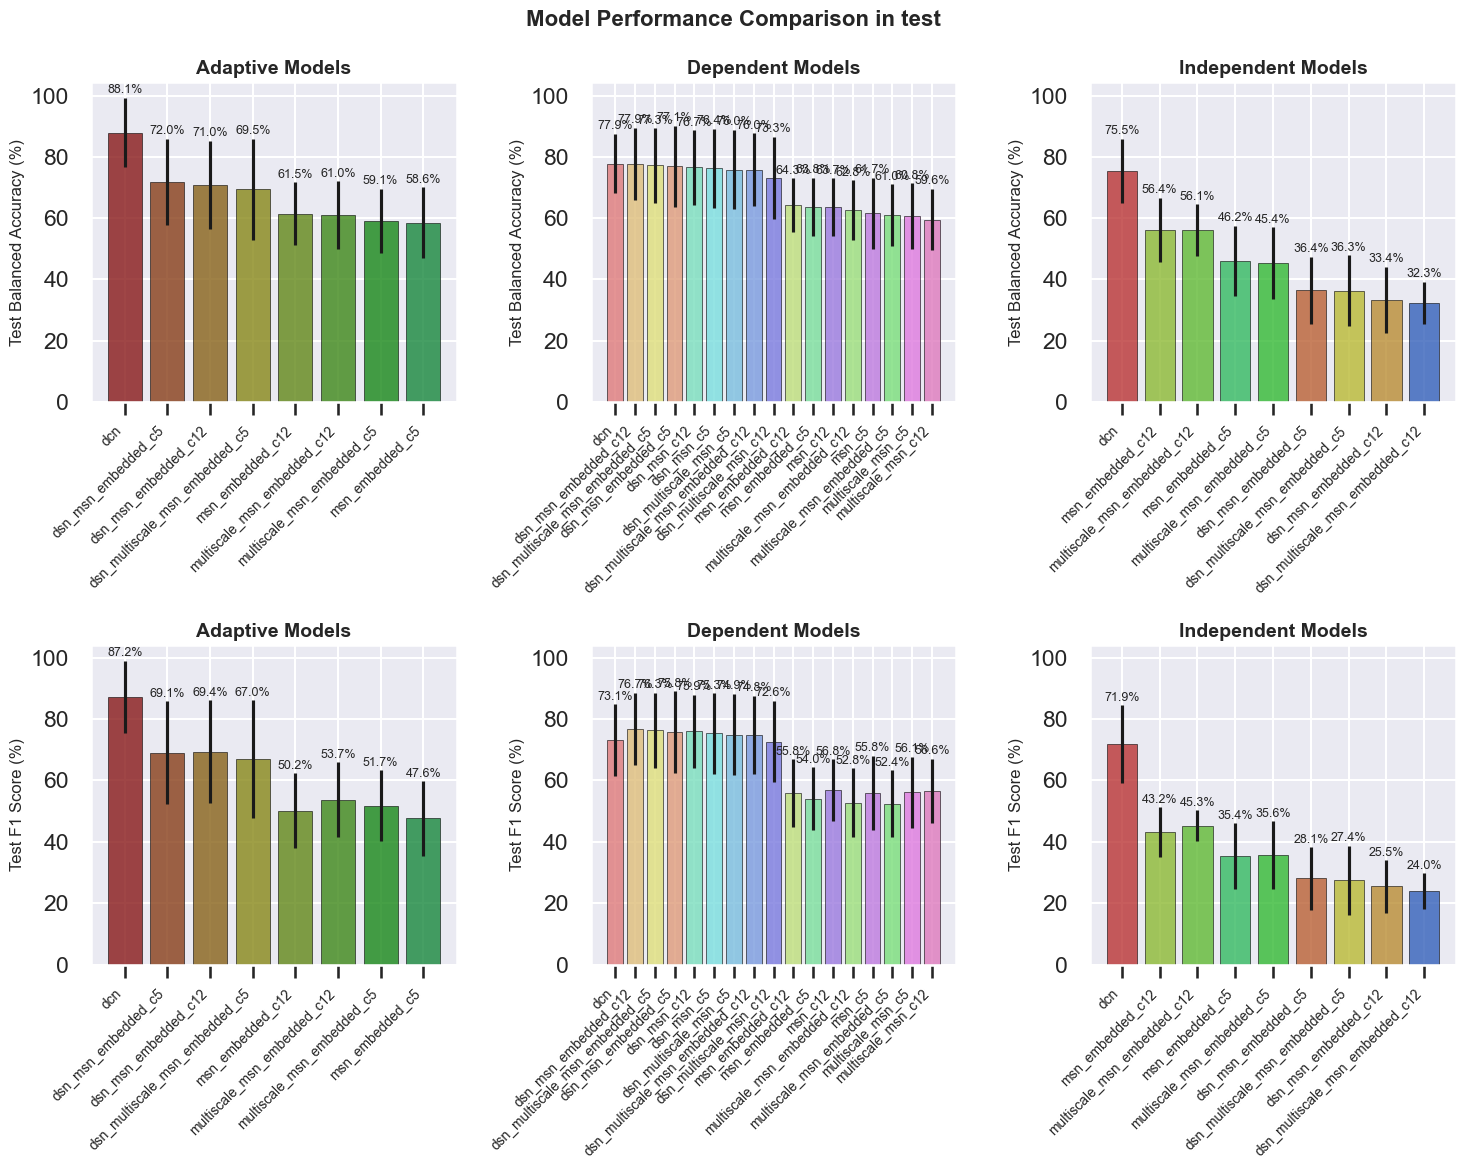

In [6]:
msf.plot_model_comparison(df, ['test_bal_acc', 'test_f1'])

Found 17 unique models: ['dcn', 'dsn_msn_embedded_c5', 'dsn_msn_embedded_c12', 'dsn_multiscale_msn_embedded_c5', 'msn_embedded_c12', 'multiscale_msn_embedded_c12', 'multiscale_msn_embedded_c5', 'msn_embedded_c5', 'dsn_msn_c12', 'dsn_msn_c5', 'dsn_multiscale_msn_c5', 'dsn_multiscale_msn_embedded_c12', 'dsn_multiscale_msn_c12', 'msn_c12', 'msn_c5', 'multiscale_msn_c5', 'multiscale_msn_c12']


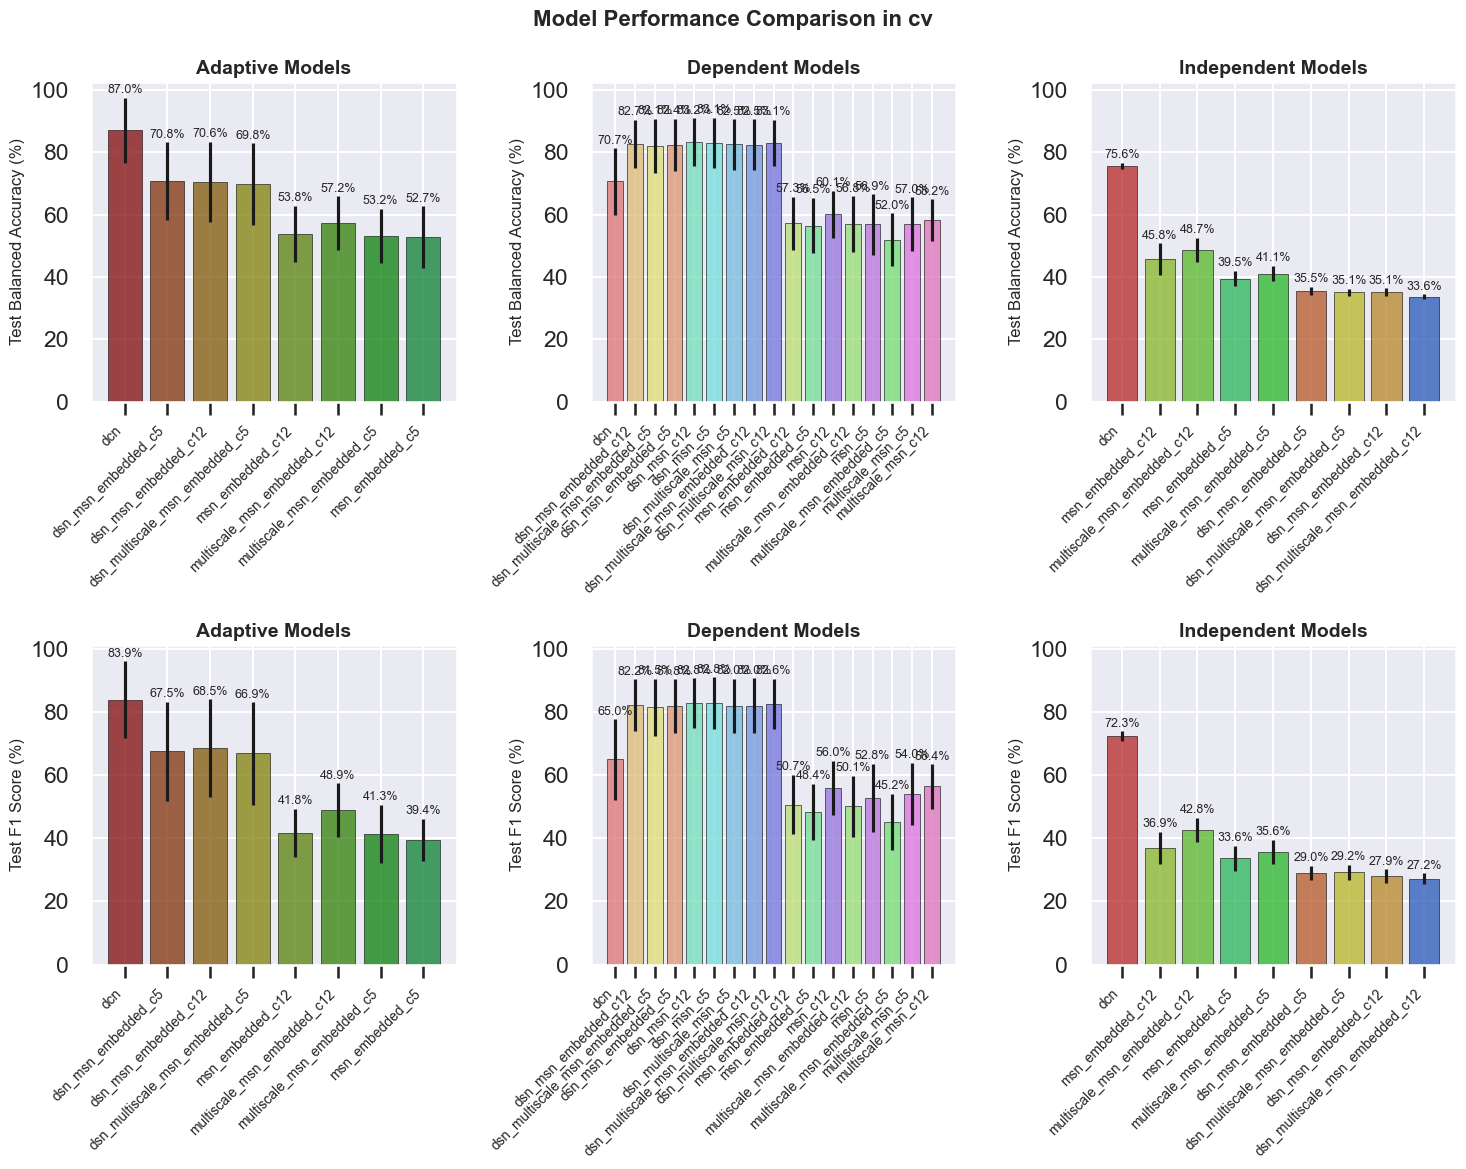

In [7]:
msf.plot_model_comparison(df, ['cv_bal_acc', 'cv_f1'], metric_type = 'cv')

### Line plots and scatter plots

In [8]:
my_custom_style = {
    'line': {
        'marker': 'o',
        'markersize': 10,
        'linewidth': 2,
        'alpha': 0.8,
        'linestyle': '--'  # dashed lines
    },
    'scatter': {
        'marker': 'o',
        's': 40,
        'alpha': 0.7
    },
    'figure': {
        'context': 'poster',
        'figsize_2x3': (30, 16),
        'figsize_1x3': (24, 8),
        'suptitle_fontsize': 22,
        'title_fontsize': 18,
        'legend_fontsize': 10,
        'ticks_fontsize': 11,
        'grid_alpha': 0.7
    }
}

Found 3 unique models: ['dcn', 'dsn_multiscale_msn_embedded_c5', 'multiscale_msn_embedded_c5']
📊 Dependent: DCN scores range from 51.25% to 94.06%
📊 Independent: DCN scores range from 46.54% to 94.16%
📊 Adaptive: DCN scores range from 55.48% to 100.00%


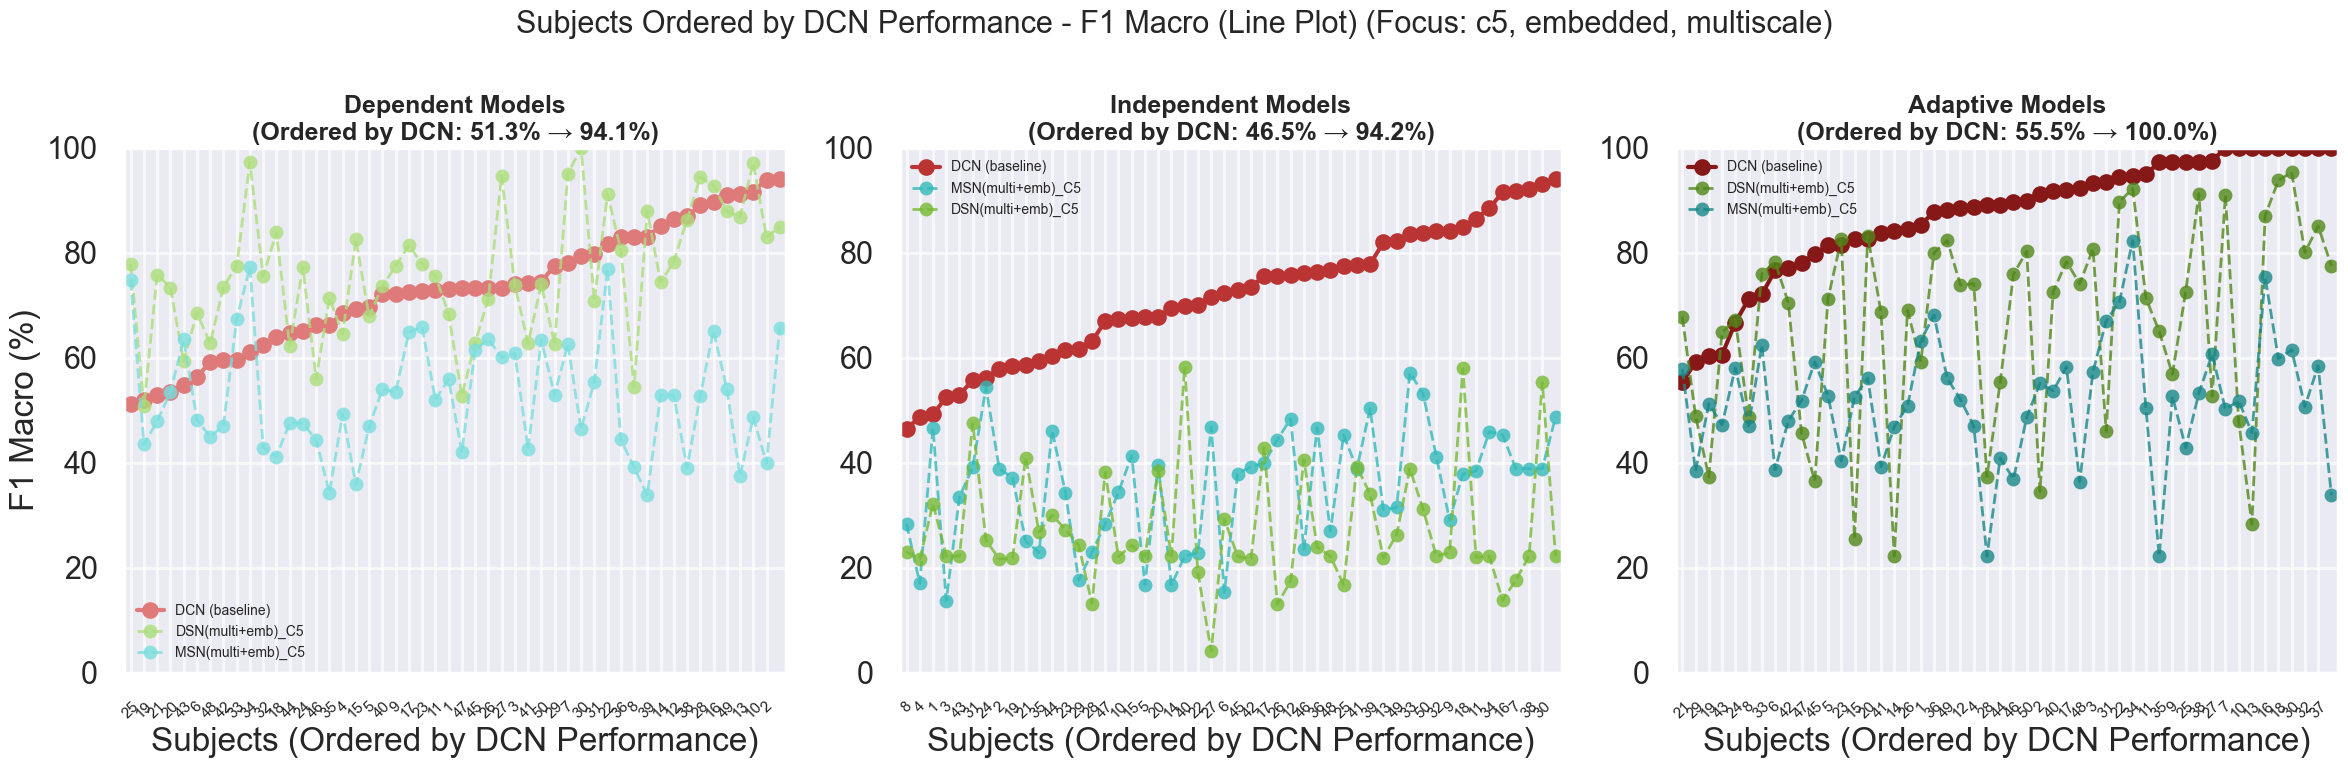

In [9]:
fig = msf.plot_subjects_dcn_ordered(df, metric='F1 Macro', plot_type='line',
                                    focus_on=['c5', 'embedded', 'multiscale'],
                                    plot_style=my_custom_style)

Found 9 unique models: ['dcn', 'dsn_msn_embedded_c5', 'dsn_multiscale_msn_embedded_c5', 'multiscale_msn_embedded_c5', 'msn_embedded_c5', 'dsn_msn_c5', 'dsn_multiscale_msn_c5', 'msn_c5', 'multiscale_msn_c5']


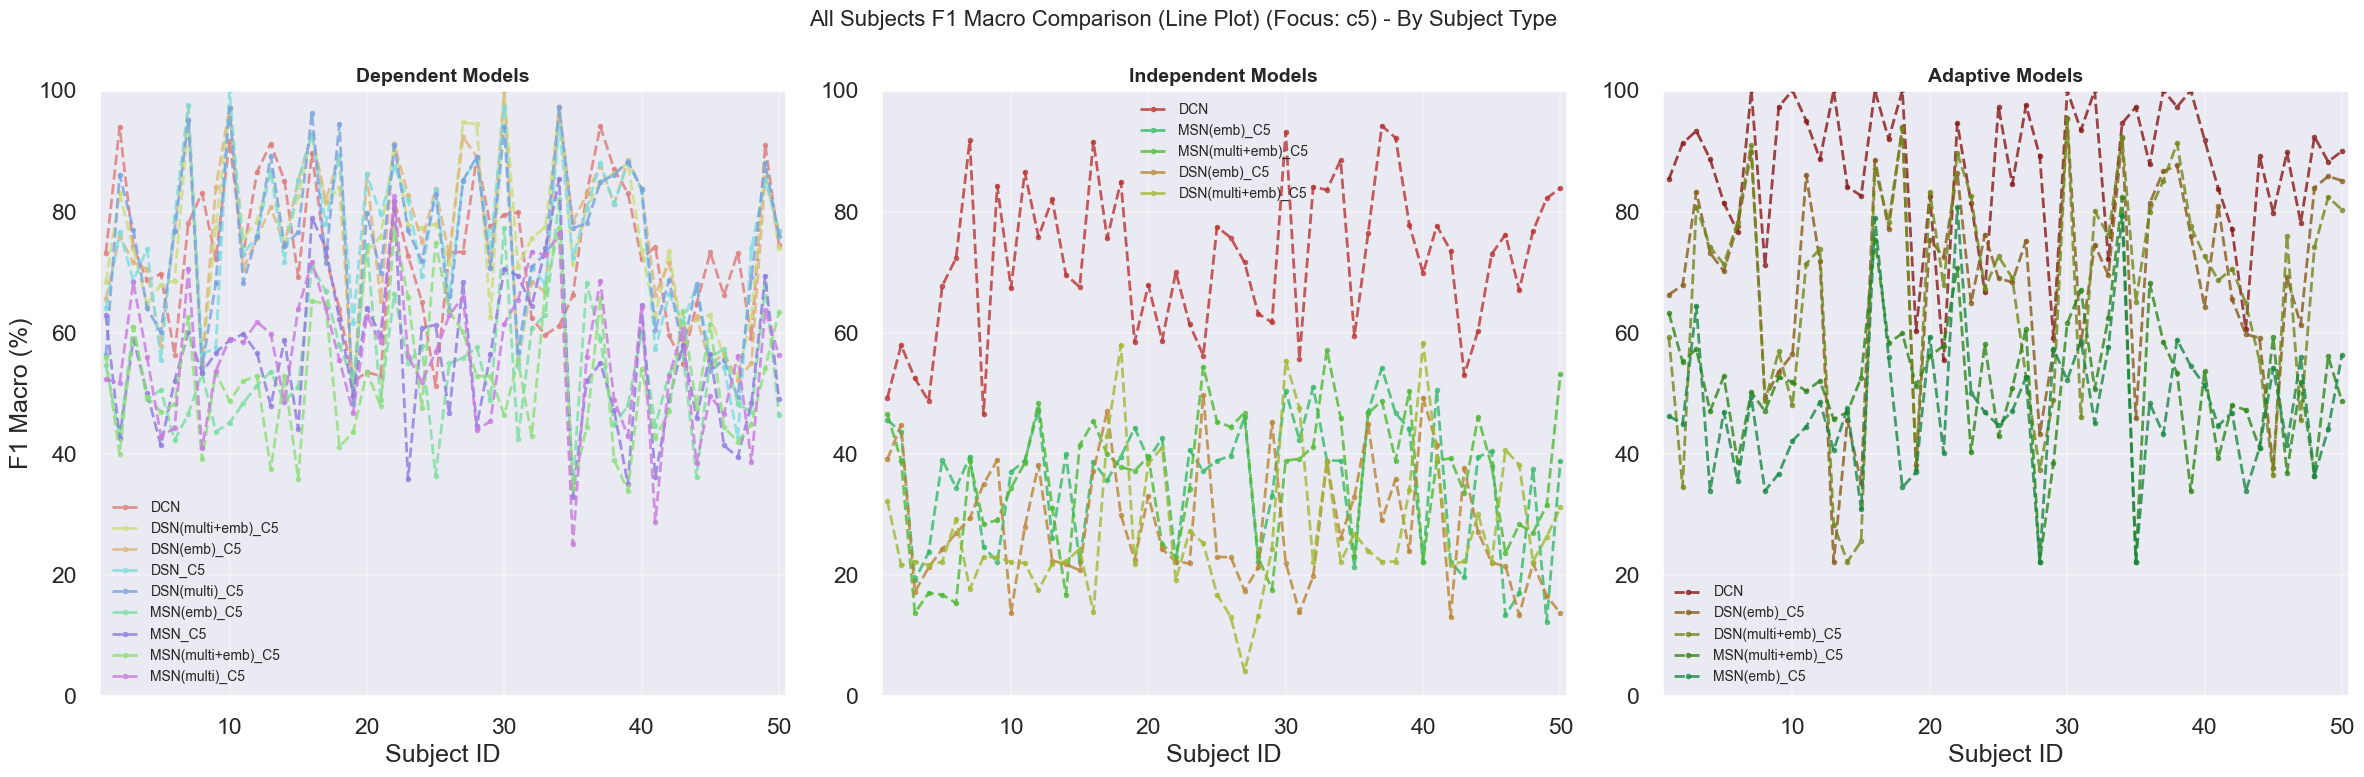

In [10]:
fig = msf.plot_subjects_comparison(df, metric='F1 Macro', plot_type='line', 
                        focus_on='c5', layout='subject_type')


Found 5 unique models: ['dcn', 'dsn_msn_embedded_c12', 'msn_embedded_c12', 'multiscale_msn_embedded_c12', 'dsn_multiscale_msn_embedded_c12']


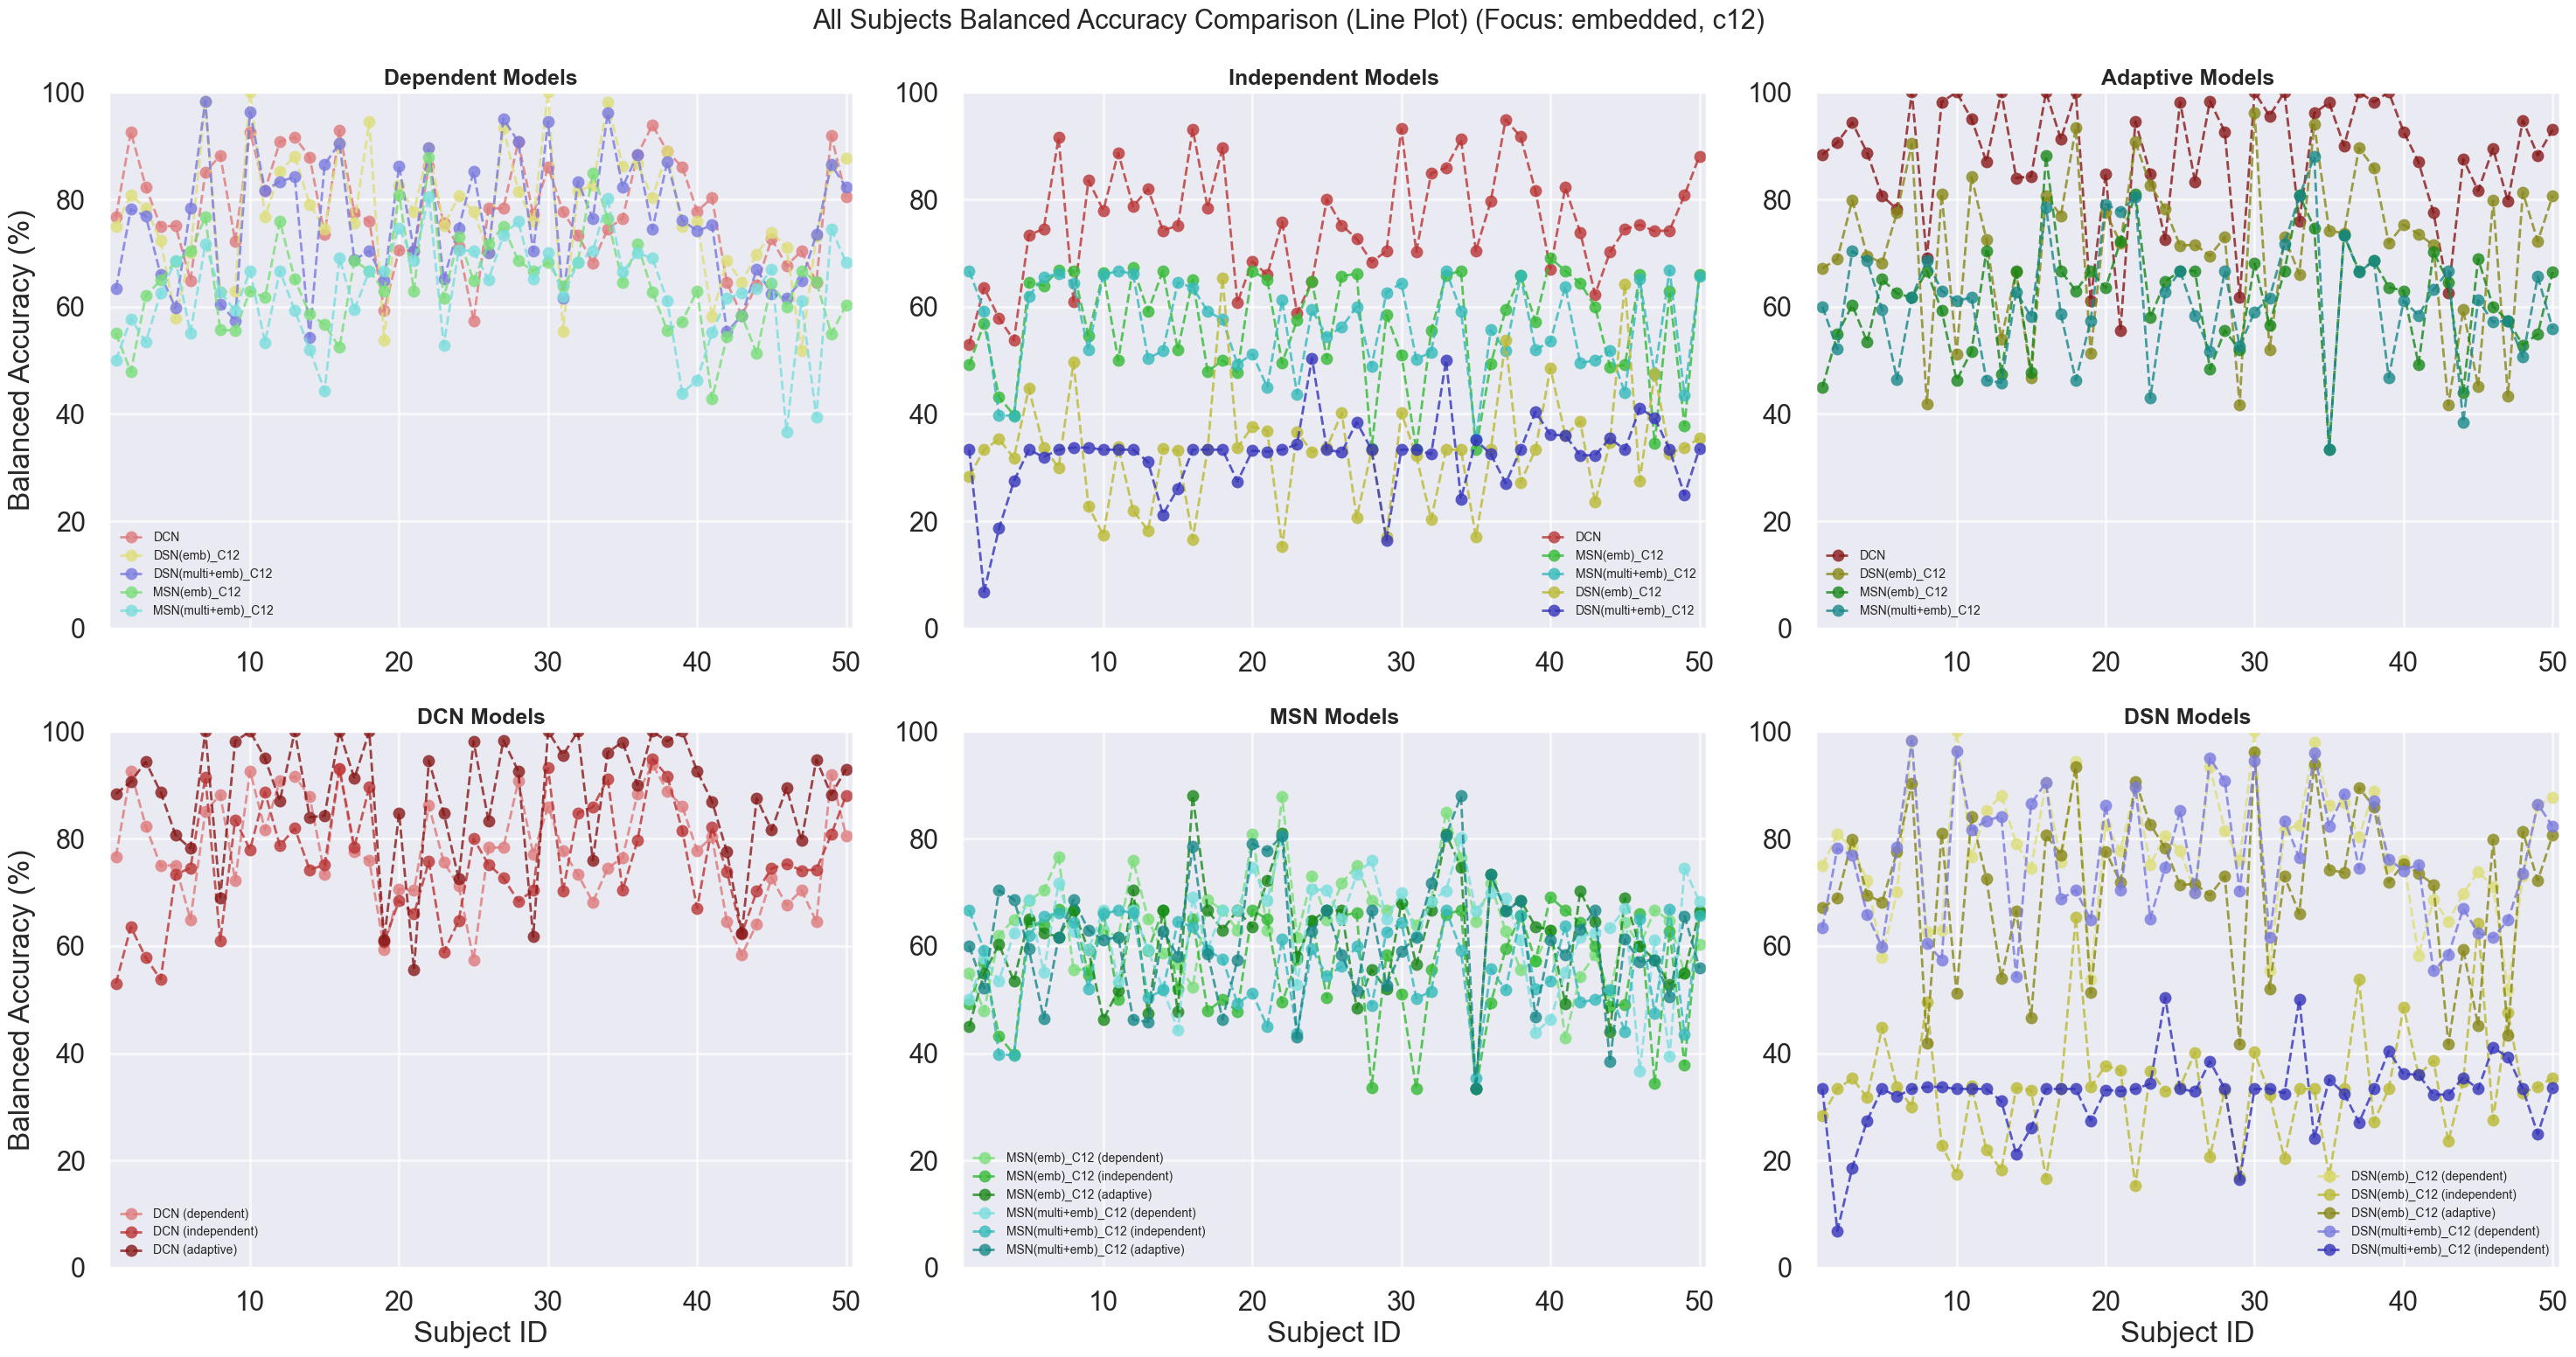

In [11]:
fig = msf.plot_subjects_line_comparison(df, focus_on=['embedded', 'c12'], plot_style=my_custom_style)

### Violin plots

Found 17 unique models: ['dcn', 'dsn_msn_embedded_c5', 'dsn_msn_embedded_c12', 'dsn_multiscale_msn_embedded_c5', 'msn_embedded_c12', 'multiscale_msn_embedded_c12', 'multiscale_msn_embedded_c5', 'msn_embedded_c5', 'dsn_msn_c12', 'dsn_msn_c5', 'dsn_multiscale_msn_c5', 'dsn_multiscale_msn_embedded_c12', 'dsn_multiscale_msn_c12', 'msn_c12', 'msn_c5', 'multiscale_msn_c5', 'multiscale_msn_c12']


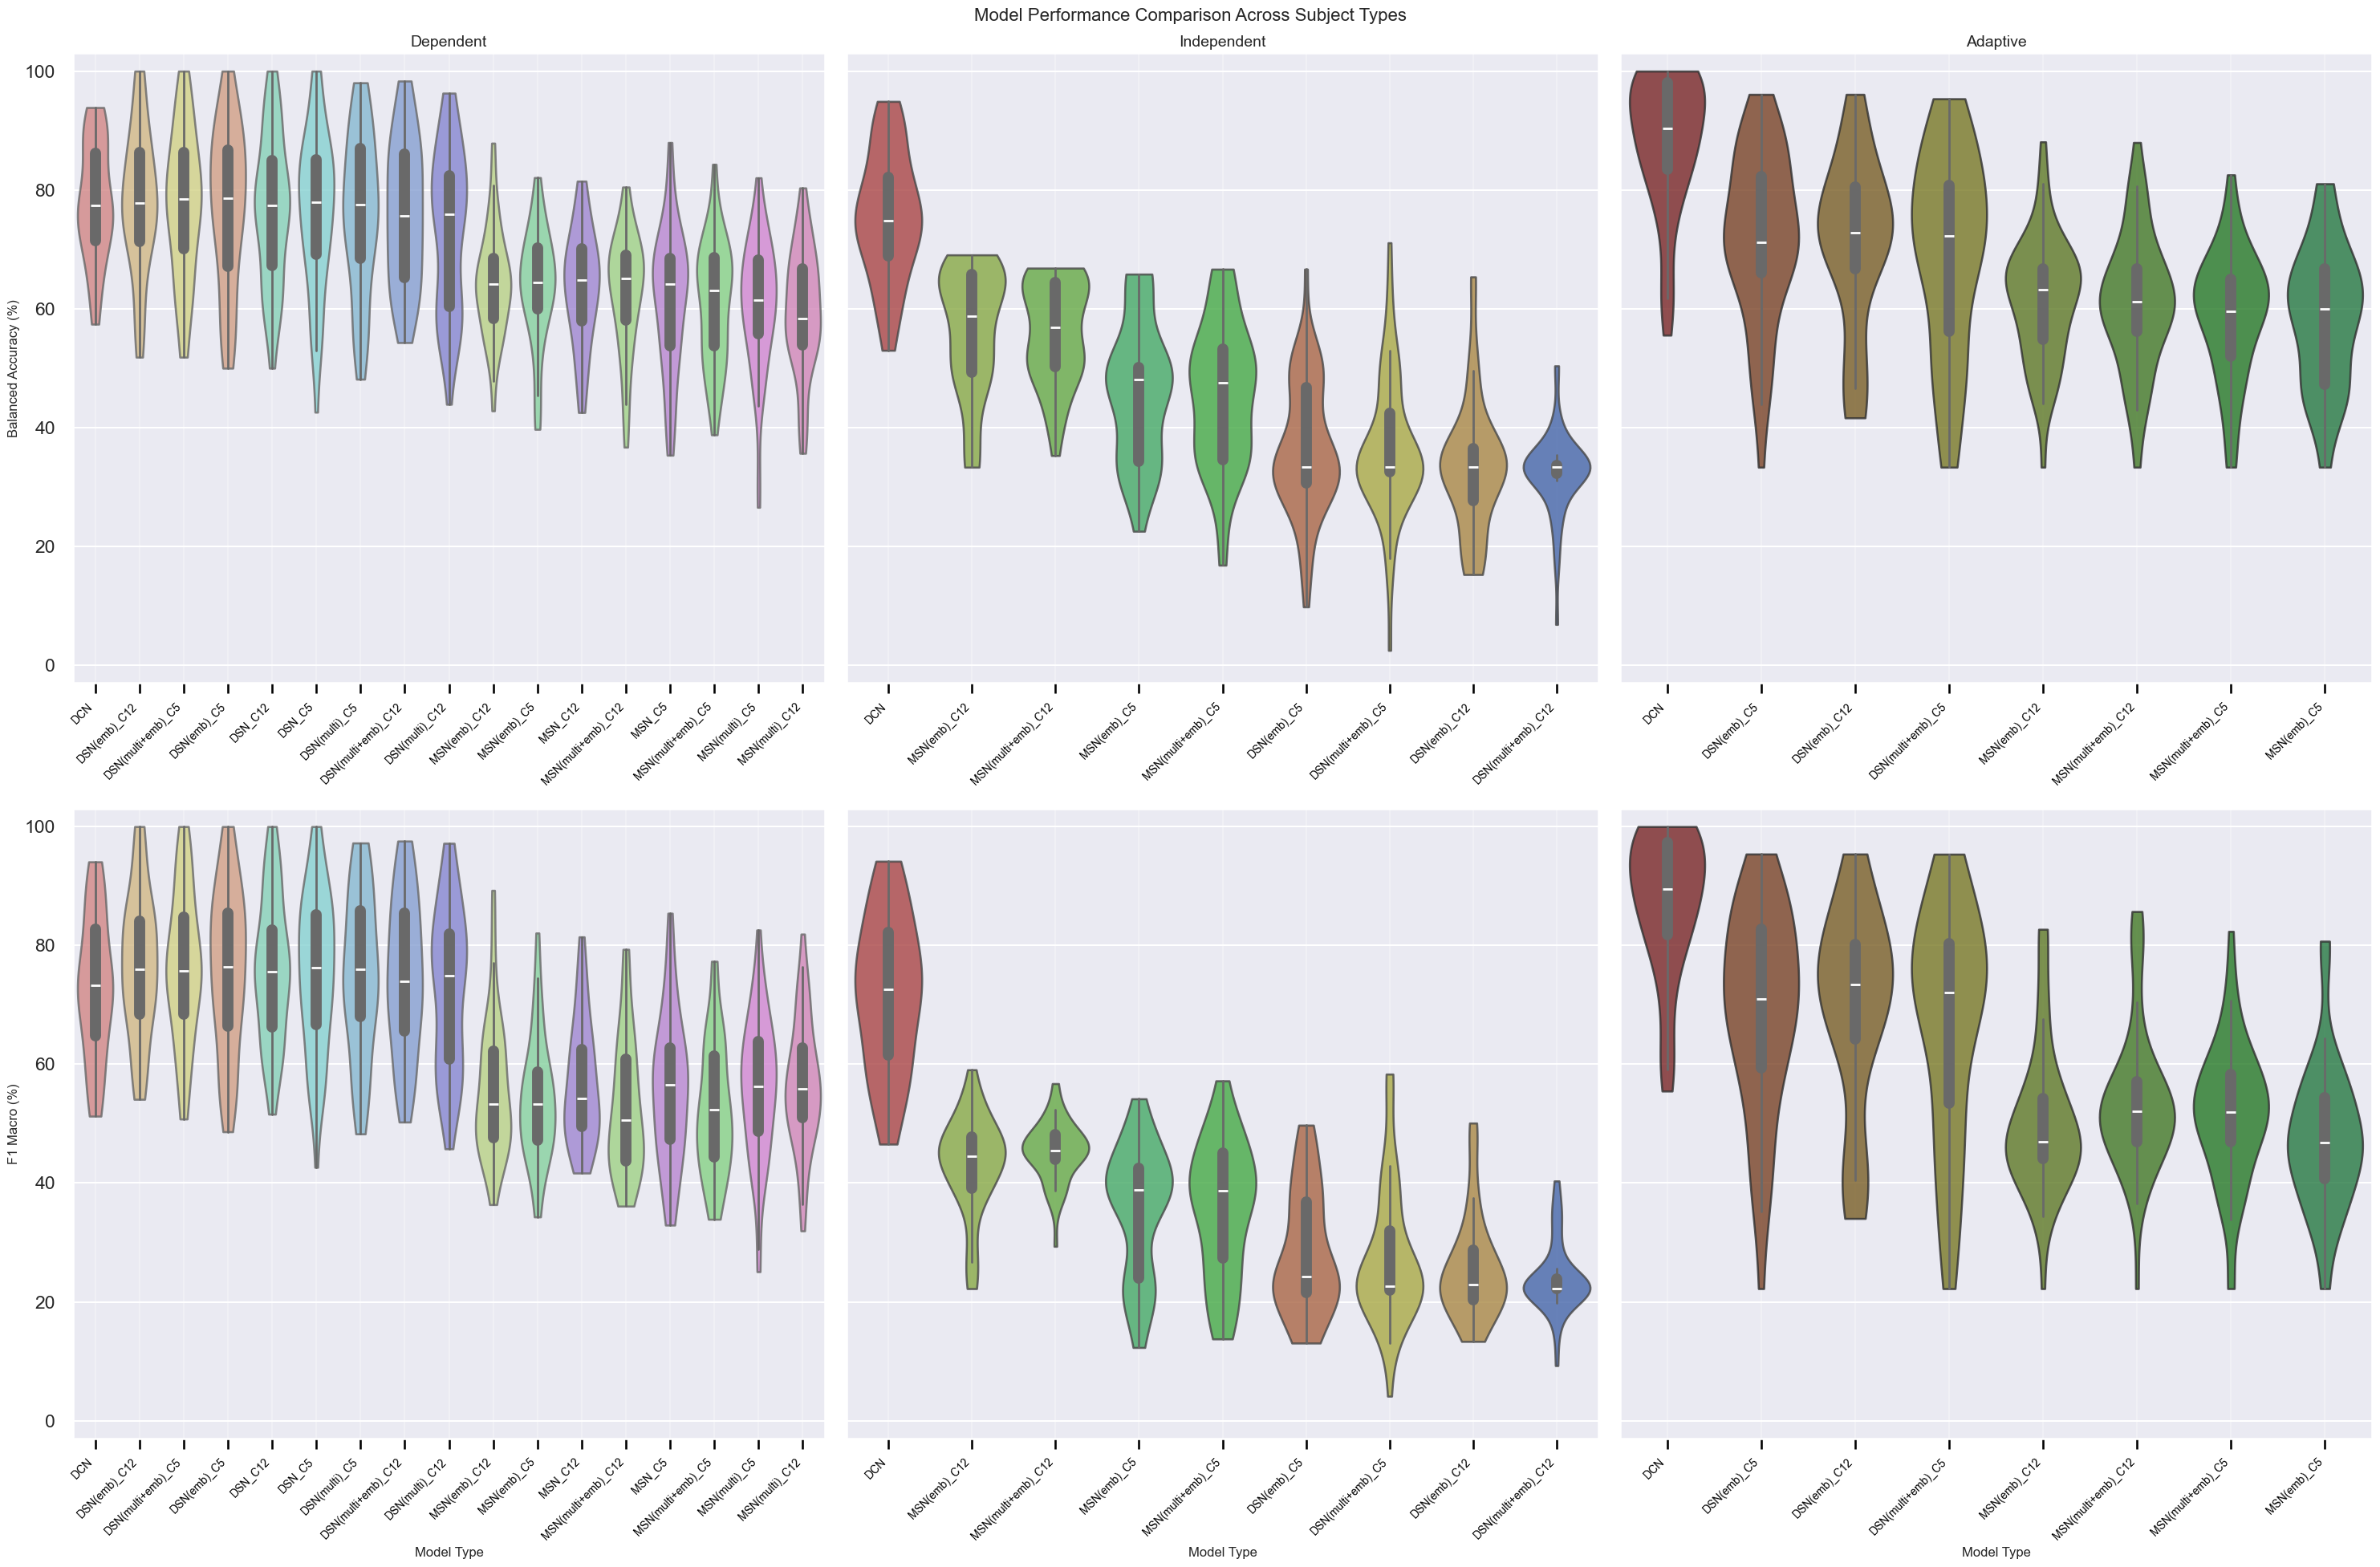

In [12]:
# Create the violin plot

msf.plot_violin_comparison(df)

Found 17 unique models: ['dcn', 'dsn_msn_embedded_c5', 'dsn_msn_embedded_c12', 'dsn_multiscale_msn_embedded_c5', 'msn_embedded_c12', 'multiscale_msn_embedded_c12', 'multiscale_msn_embedded_c5', 'msn_embedded_c5', 'dsn_msn_c12', 'dsn_msn_c5', 'dsn_multiscale_msn_c5', 'dsn_multiscale_msn_embedded_c12', 'dsn_multiscale_msn_c12', 'msn_c12', 'msn_c5', 'multiscale_msn_c5', 'multiscale_msn_c12']


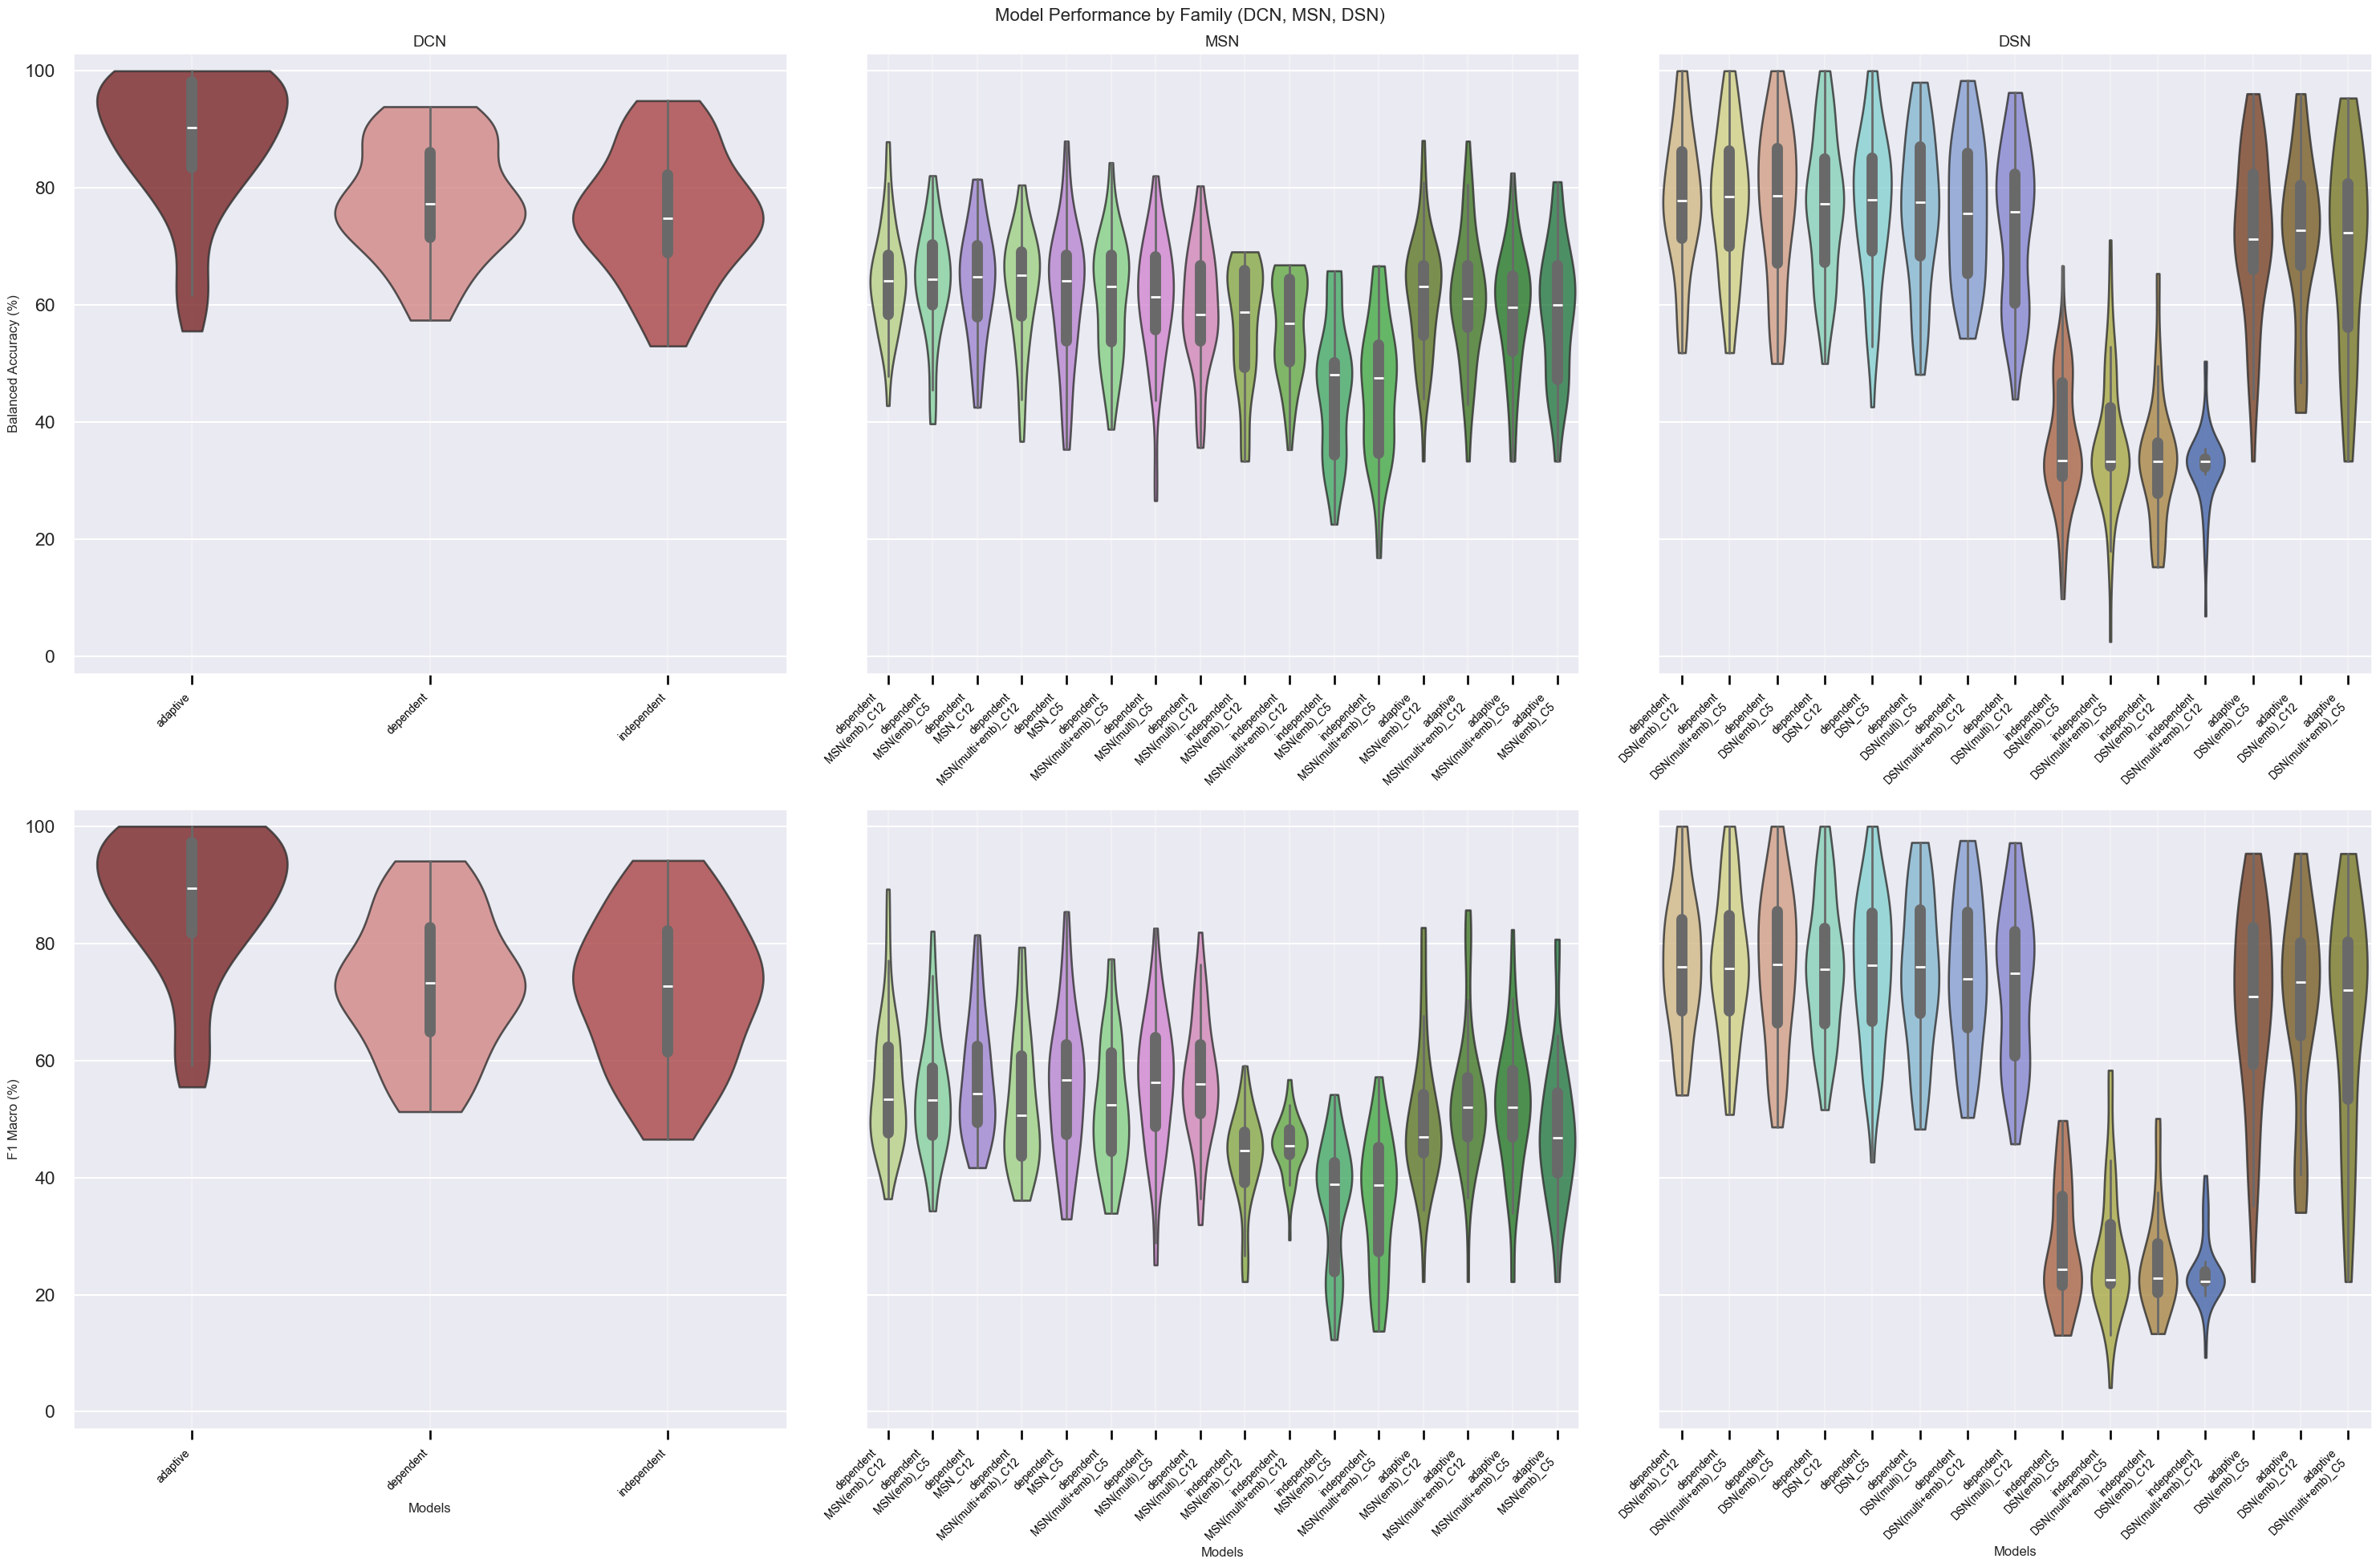

In [13]:
msf.plot_grouped_comparison(df)

## Statistical significance of results

### Checking for statistical significance comparing model types within each study type

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style and define consistent color palette
try:
    BASE_COLORS = sns.color_palette("colorblind")
except:
    BASE_COLORS = sns.color_palette("Set2")

# Define consistent color mapping for subject types
SUBJECT_TYPE_COLORS = {
    'dependent': BASE_COLORS[0],    # Blue
    'independent': BASE_COLORS[1],  # Orange  
    'adaptive': BASE_COLORS[2],     # Green
    'embedded': BASE_COLORS[0]      # Same as dependent (blue)
}

# Define consistent ordering for subject types
SUBJECT_TYPE_ORDER = ['dependent', 'independent', 'adaptive']

def prepare_comparison_data(df, score_type, comparison_type):
    """
    Prepare data for specific comparison type (cluster, scale, or encoding)
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The results dataframe
    score_type : str
        One of ['test_bal_acc_all', 'test_f1_all', 'cv_bal_acc_all', 'cv_f1_all']
    comparison_type : str
        One of ['cluster', 'scale', 'encoding']
    
    Returns:
    --------
    pandas.DataFrame
        Long-format data ready for analysis
    """
    
    # Filter for MSN and DSN models only
    model_df = df[df['base_model'].isin(['MSN', 'DSN'])].copy()
    
    # Prepare long-format data
    long_data = []
    
    for idx, row in model_df.iterrows():
        scores = row[score_type]
        if isinstance(scores, list):
            for i, score in enumerate(scores):
                long_data.append({
                    'subject_id': i,
                    'score': score,
                    'subject_type': row['subject_type'],
                    'model_name': row['model_name'],
                    'model_id': row['model_id'],
                    'base_model': row['base_model'],
                    'cluster_size': row['cluster_size'],
                    'is_embedded': row['is_embedded'],
                    'is_multiscale': 'multiscale' in row['model_name'],
                    'score_type': score_type
                })
    
    long_df = pd.DataFrame(long_data)
    
    # Add comparison-specific variables
    if comparison_type == 'cluster':
        long_df['condition'] = long_df['cluster_size'].astype(str)
        long_df = long_df[long_df['cluster_size'].notna()]  # Remove DCN models
        
    elif comparison_type == 'scale':
        long_df['condition'] = long_df['is_multiscale'].map({True: 'multiscale', False: 'regular'})
        
    elif comparison_type == 'encoding':
        long_df['condition'] = long_df['is_embedded'].map({True: 'embedded', False: 'one_hot'})
        long_df = long_df[long_df['subject_type'] == 'dependent']  # Only dependent for encoding
        
    return long_df

def create_model_pairs(long_df, comparison_type):
    """
    Create pairs of models for comparison based on comparison type
    
    Returns:
    --------
    list
        List of tuples (model_base, condition1_data, condition2_data)
    """
    pairs = []
    
    if comparison_type == 'cluster':
        # Group by subject_type, base_model, and other factors except cluster_size
        group_cols = ['subject_type', 'base_model', 'is_embedded', 'is_multiscale']
        
    elif comparison_type == 'scale':
        # Group by subject_type, base_model, cluster_size, and embedded status
        group_cols = ['subject_type', 'base_model', 'cluster_size', 'is_embedded']
        
    elif comparison_type == 'encoding':
        # Group by base_model, cluster_size, and scale (dependent only)
        group_cols = ['base_model', 'cluster_size', 'is_multiscale']
    
    for group_key, group_data in long_df.groupby(group_cols):
        conditions = group_data['condition'].unique()
        
        if len(conditions) == 2:
            cond1, cond2 = sorted(conditions)
            cond1_data = group_data[group_data['condition'] == cond1]['score'].values
            cond2_data = group_data[group_data['condition'] == cond2]['score'].values
            
            # Get model identifiers for this pair
            models_cond1 = group_data[group_data['condition'] == cond1]['model_id'].unique()
            models_cond2 = group_data[group_data['condition'] == cond2]['model_id'].unique()
            
            if len(cond1_data) > 0 and len(cond2_data) > 0:
                pairs.append({
                    'group_key': group_key,
                    'condition1': cond1,
                    'condition2': cond2,
                    'condition1_data': cond1_data,
                    'condition2_data': cond2_data,
                    'model1_id': models_cond1[0] if len(models_cond1) > 0 else f"{group_key}_{cond1}",
                    'model2_id': models_cond2[0] if len(models_cond2) > 0 else f"{group_key}_{cond2}",
                    'group_cols': group_cols
                })
    
    return pairs

def cohen_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * np.var(group1, ddof=1) + (n2 - 1) * np.var(group2, ddof=1)) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

def cohen_d_ci(d, n1, n2, confidence=0.95):
    """Calculate confidence interval for Cohen's d"""
    # Approximate confidence interval for Cohen's d
    se = np.sqrt((n1 + n2) / (n1 * n2) + d**2 / (2 * (n1 + n2)))
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, n1 + n2 - 2)
    ci_lower = d - t_crit * se
    ci_upper = d + t_crit * se
    return ci_lower, ci_upper

def perform_pairwise_comparisons(model_pairs, comparison_type):
    """
    Perform pairwise comparisons for all model pairs
    
    Returns:
    --------
    pandas.DataFrame
        Results with statistics for each comparison
    """
    results = []
    
    for pair in model_pairs:
        group1 = pair['condition1_data']
        group2 = pair['condition2_data']
        
        # Perform t-test (paired if same subjects, independent otherwise)
        if len(group1) == len(group2):
            # Assume paired if same length (same subjects)
            t_stat, p_value = ttest_rel(group1, group2)
            test_type = 'paired'
        else:
            t_stat, p_value = ttest_ind(group1, group2)
            test_type = 'independent'
        
        # Calculate effect size
        d = cohen_d(group1, group2)
        ci_lower, ci_upper = cohen_d_ci(d, len(group1), len(group2))
        
        # Create descriptive label
        if comparison_type == 'cluster':
            subject_type = pair['group_key'][0]
            base_model = pair['group_key'][1]
            is_embedded = pair['group_key'][2]
            is_multiscale = pair['group_key'][3]
            
            label = base_model.lower()
            if is_multiscale:
                label = f"multiscale_{label}"
            if is_embedded:
                label += "_embedded"
                
        elif comparison_type == 'scale':
            subject_type = pair['group_key'][0]
            base_model = pair['group_key'][1]
            cluster_size = pair['group_key'][2]
            is_embedded = pair['group_key'][3]
            
            label = base_model.lower()
            if cluster_size and not pd.isna(cluster_size):
                label += f"_c{int(cluster_size)}"
            if is_embedded:
                label += "_embedded"
                
        elif comparison_type == 'encoding':
            base_model = pair['group_key'][0]
            cluster_size = pair['group_key'][1]
            is_multiscale = pair['group_key'][2]
            
            label = base_model.lower()
            if is_multiscale:
                label = f"multiscale_{label}"
            if cluster_size and not pd.isna(cluster_size):
                label += f"_c{int(cluster_size)}"
        
        results.append({
            'comparison_type': comparison_type,
            'model_label': label,
            'subject_type': pair['group_key'][0] if comparison_type != 'encoding' else 'dependent',
            'condition1': pair['condition1'],
            'condition2': pair['condition2'],
            'n1': len(group1),
            'n2': len(group2),
            'mean1': np.mean(group1),
            'mean2': np.mean(group2),
            'std1': np.std(group1, ddof=1),
            'std2': np.std(group2, ddof=1),
            't_stat': t_stat,
            'p_value': p_value,
            'test_type': test_type,
            'cohens_d': d,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'significant': p_value < 0.05,
            'effect_size_interpretation': 'small' if abs(d) < 0.5 else 'medium' if abs(d) < 0.8 else 'large'
        })
    
    return pd.DataFrame(results)

def create_forest_plot(results_df_dict, comparison_type, score_types, save_path=None, plot_params=None):
    """
    Create forest plot for comparison results (side-by-side for multiple metrics)
    
    Parameters:
    -----------
    results_df_dict : dict or pandas.DataFrame
        If dict: {score_type: results_df} for multiple metrics
        If DataFrame: single metric results
    comparison_type : str
        Type of comparison (cluster, scale, encoding)
    score_types : list or str
        Score types being analyzed
    save_path : str, optional
        Path to save the plot
    plot_params : dict, optional
        Plot customization parameters
    """
    
    # Default plot parameters
    default_params = {
        'figsize': (16, 10),
        'context': 'talk',  # 'paper', 'notebook', 'talk', 'poster'
        'style': 'darkgrid',
        'font_scale': 1.0,
        'title_fontsize': 16,
        'label_fontsize': 12,
        'tick_fontsize': 10,
        'legend_fontsize': 11,
        'line_width': 2,
        'marker_size': 8,
        'text_offset': 0.05,  # Distance of text from plot edge
        'xlim': (-1.5, 1.5),
        'colors': None,  # Will use consistent color mapping
        'show_overall': True,
        'dpi': 300
    }
    
    # Update with user parameters
    if plot_params:
        default_params.update(plot_params)
    
    params = default_params
    
    # Set seaborn context and style
    with sns.plotting_context(params['context'], font_scale=params['font_scale']):
        sns.set_style(params['style'])
        
        # Handle single vs multiple metrics
        if isinstance(results_df_dict, pd.DataFrame):
            # Single metric - convert to dict format
            results_df_dict = {score_types: results_df_dict}
            score_types = [score_types]
        
        # Filter out empty results
        valid_results = {k: v for k, v in results_df_dict.items() if not v.empty}
        
        if not valid_results:
            print(f"No results to plot for {comparison_type} comparison")
            return None
        
        n_plots = len(valid_results)
        
        # Set up subplots
        fig, axes = plt.subplots(1, n_plots, figsize=(params['figsize'][0], params['figsize'][1]))
        if n_plots == 1:
            axes = [axes]  # Make it iterable
        
        # Plot each metric
        for plot_idx, (score_type, results_df) in enumerate(valid_results.items()):
            ax = axes[plot_idx]
            
            # Get subject types in consistent order
            if comparison_type == 'encoding':
                # For encoding, always show as 'dependent' to maintain consistency
                subject_types_present = ['dependent']
                results_df = results_df.copy()
                results_df['subject_type'] = 'dependent'  # Ensure consistent labeling
            else:
                available_types = set(results_df['subject_type'].unique())
                subject_types_present = [st for st in SUBJECT_TYPE_ORDER if st in available_types]
            
            # FLIPPED: Calculate total height first to work backwards
            total_models = 0
            for subject_type in subject_types_present:
                subset = results_df[results_df['subject_type'] == subject_type]
                total_models += len(subset)
            
            # Calculate overall effect space if needed
            overall_space = 2 if len(results_df) > 1 and params['show_overall'] else 0
            
            # Starting from the top
            max_y = total_models + len(subject_types_present) * 1.8 + overall_space + 1
            y_pos = max_y
            
            y_labels = []
            y_positions = []
            
            # Track spacing for better layout
            section_spacing = 1.0
            model_spacing = 0.8
            
            # FLIPPED: Process subject types in reverse order to start from top
            for subject_type in reversed(subject_types_present):
                subset = results_df[results_df['subject_type'] == subject_type]
                
                if len(subset) == 0:
                    continue
                
                # Get color for this subject type
                if comparison_type == 'encoding':
                    color = SUBJECT_TYPE_COLORS['dependent']  # Always blue for encoding
                else:
                    color = SUBJECT_TYPE_COLORS[subject_type]
                
                # FLIPPED: Move up for header space first
                y_pos -= 0.8
                
                # Add subject type header positioned with the data
                header_text = f"{subject_type.upper()} MODELS"
                ax.text(params['xlim'][1] + params['text_offset'], y_pos + 0.3, 
                       header_text, 
                       fontweight='bold', fontsize=params['label_fontsize'] + 1, 
                       ha='left', va='center',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
                
                # Sort models for consistent ordering within subject type
                # FLIPPED: Reverse the sort order too
                subset_sorted = subset.sort_values('model_label', ascending=False)
                
                # Plot each model comparison
                for _, row in subset_sorted.iterrows():
                    # FLIPPED: Move up for each model
                    y_pos -= model_spacing
                    
                    # Plot confidence interval
                    ax.plot([row['ci_lower'], row['ci_upper']], [y_pos, y_pos], 
                           color=color, linewidth=params['line_width'], alpha=0.8)
                    
                    # Plot point estimate
                    marker_color = color if row['significant'] else 'lightgray'
                    marker_edge_color = 'black' if row['significant'] else 'gray'
                    marker = 'o' if row['significant'] else 's'
                    ax.plot(row['cohens_d'], y_pos, marker, color=marker_color, 
                           markersize=params['marker_size'], 
                           markeredgecolor=marker_edge_color, markeredgewidth=1)
                    
                    # Add model label and statistics
                    p_text = f"p={row['p_value']:.3f}" if row['p_value'] >= 0.001 else "p<0.001"
                    label = f"{row['model_label']:<22} d={row['cohens_d']:+.2f} [{row['ci_lower']:+.2f},{row['ci_upper']:+.2f}] {p_text}"
                    
                    ax.text(params['xlim'][1] + params['text_offset'], y_pos, label, 
                           ha='left', va='center', fontsize=params['tick_fontsize'], 
                           fontweight='bold' if row['significant'] else 'normal',
                           alpha=1.0 if row['significant'] else 0.7)
                    
                    y_labels.append(row['model_label'])
                    y_positions.append(y_pos)
                
                # FLIPPED: Move up for section spacing
                y_pos -= section_spacing
            
            # Calculate and plot overall effect
            if len(results_df) > 1 and params['show_overall']:
                overall_d = np.mean(results_df['cohens_d'])
                overall_se = np.std(results_df['cohens_d']) / np.sqrt(len(results_df))
                overall_ci_lower = overall_d - 1.96 * overall_se
                overall_ci_upper = overall_d + 1.96 * overall_se
                
                # FLIPPED: Move up for separator and overall effect
                y_pos -= 0.3
                
                # Add separator line
                ax.axhline(y=y_pos + 0.2, color='black', linestyle='-', alpha=0.4, linewidth=1)
                y_pos -= 0.3
                
                # Plot overall effect
                ax.plot([overall_ci_lower, overall_ci_upper], [y_pos, y_pos], 
                       color='black', linewidth=params['line_width'] + 1, alpha=0.9)
                ax.plot(overall_d, y_pos, 'D', color='black', markersize=params['marker_size'] + 2, 
                       markeredgecolor='white', markeredgewidth=1.5)
                
                # Overall effect label
                overall_label = f"{'OVERALL EFFECT':<22} d={overall_d:+.2f} [{overall_ci_lower:+.2f},{overall_ci_upper:+.2f}]"
                ax.text(params['xlim'][1] + params['text_offset'], y_pos, overall_label, 
                       ha='left', va='center', fontsize=params['label_fontsize'], 
                       fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.1))
            
            # Customize plot
            ax.axvline(x=0, color='black', linestyle='--', alpha=0.6, linewidth=1)
            ax.set_xlabel("Cohen's d Effect Size", fontsize=params['label_fontsize'], fontweight='bold')
            ax.set_xlim(params['xlim'])
            
            # FLIPPED: Set y-limits with the new positioning
            ax.set_ylim(y_pos - 1, max_y + 0.5)
            
            # Set title based on comparison type
            if comparison_type == 'cluster':
                direction_text = f"← favors c5     favors c12 →"
                main_title = f"Cluster Size Effect (c5 vs c12)"
            elif comparison_type == 'scale':
                direction_text = f"← favors regular     favors multiscale →"
                main_title = f"Scale Type Effect (regular vs multiscale)"
            elif comparison_type == 'encoding':
                direction_text = f"← favors one-hot     favors embedded →"
                main_title = f"Encoding Effect (one-hot vs embedded)"
            
            score_name = score_type.replace('_all', '').replace('_', ' ').title()
            if n_plots == 1:
                title = f"{main_title} - {score_name}"
            else:
                title = score_name
            
            ax.set_title(title, fontsize=params['title_fontsize'], fontweight='bold', pad=20)
            
            # Add direction labels at the bottom
            ax.text(0, y_pos - 0.5, direction_text, ha='center', va='center', 
                   fontsize=params['tick_fontsize'], style='italic')
            
            # Remove y-axis ticks and labels
            ax.set_yticks([])
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
            # Add grid for better readability
        
        # Add main title for multi-plot figures
        if n_plots > 1:
            fig.suptitle(main_title, fontsize=params['title_fontsize'] + 2, fontweight='bold', y=0.98)
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=params['dpi'], bbox_inches='tight', facecolor='white')
            print(f"Forest plot saved to: {save_path}")
        
        return fig

def analyze_model_comparisons(df, score_types=['test_bal_acc_all', 'test_f1_all'], 
                             display_metrics='both', save_dir='./results/', plot_params=None):
    """
    Main function to analyze all model comparisons
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Results dataframe with model performance data
    score_types : list
        List of score types to analyze
    display_metrics : str
        'bal_acc', 'f1', or 'both'
    save_dir : str
        Directory to save results
    plot_params : dict, optional
        Plot customization parameters (see create_forest_plot for options)
    
    Returns:
    --------
    dict
        Dictionary containing all results and plots
    """
    
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    # Filter score types based on display_metrics
    if display_metrics == 'bal_acc':
        score_types = [s for s in score_types if 'bal_acc' in s]
    elif display_metrics == 'f1':
        score_types = [s for s in score_types if 'f1' in s]
    # 'both' uses all provided score_types
    
    comparison_types = ['cluster', 'scale', 'encoding']
    results = {}
    
    print("🚀 Starting Model Comparison Analysis")
    print("=" * 50)
    
    for comparison_type in comparison_types:
        print(f"\n📊 Analyzing {comparison_type.title()} Comparisons...")
        results[comparison_type] = {}
        
        # Collect all results for this comparison type
        comparison_results_dict = {}
        
        for score_type in score_types:
            print(f"   Processing {score_type}...")
            
            # Prepare data
            long_data = prepare_comparison_data(df, score_type, comparison_type)
            
            if len(long_data) == 0:
                print(f"   ⚠️  No data found for {comparison_type} - {score_type}")
                continue
            
            # Create model pairs
            model_pairs = create_model_pairs(long_data, comparison_type)
            
            if len(model_pairs) == 0:
                print(f"   ⚠️  No model pairs found for {comparison_type} - {score_type}")
                continue
            
            # Perform comparisons
            comparison_results = perform_pairwise_comparisons(model_pairs, comparison_type)
            
            if len(comparison_results) == 0:
                print(f"   ⚠️  No comparison results for {comparison_type} - {score_type}")
                continue
            
            # Store results for plotting
            comparison_results_dict[score_type] = comparison_results
            
            # Save individual summary table
            csv_filename = f"{comparison_type}_{score_type}_summary.csv"
            csv_path = os.path.join(save_dir, csv_filename)
            comparison_results.to_csv(csv_path, index=False)
            
            print(f"   ✅ Found {len(comparison_results)} comparisons, "
                  f"{sum(comparison_results['significant'])} significant")
        
        # Create combined forest plot if we have results
        if comparison_results_dict:
            if display_metrics == 'both' and len(comparison_results_dict) > 1:
                # Side-by-side plot for multiple metrics
                plot_filename = f"{comparison_type}_combined_forest_plot.png"
                plot_path = os.path.join(save_dir, plot_filename)
                
                forest_fig = create_forest_plot(comparison_results_dict, comparison_type, 
                                              list(comparison_results_dict.keys()), 
                                              save_path=plot_path, plot_params=plot_params)
            else:
                # Individual plots for single metric
                forest_fig = None
                for score_type, comparison_results in comparison_results_dict.items():
                    plot_filename = f"{comparison_type}_{score_type}_forest_plot.png"
                    plot_path = os.path.join(save_dir, plot_filename)
                    
                    single_fig = create_forest_plot(comparison_results, comparison_type, 
                                                  score_type, save_path=plot_path, 
                                                  plot_params=plot_params)
                    if forest_fig is None:
                        forest_fig = single_fig
            
            # Store all results for this comparison type
            total_comparisons = sum(len(df) for df in comparison_results_dict.values())
            total_significant = sum(sum(df['significant']) for df in comparison_results_dict.values())
            
            results[comparison_type] = {
                'data_by_score': comparison_results_dict,
                'plot': forest_fig,
                'n_comparisons': total_comparisons,
                'n_significant': total_significant,
                'score_types': list(comparison_results_dict.keys())
            }
    
    # Print summary
    print(f"\n🏆 ANALYSIS COMPLETE")
    print("=" * 50)
    
    for comp_type, comp_results in results.items():
        if comp_results:
            print(f"\n{comp_type.title()} Comparisons:")
            print(f"  Total: {comp_results['n_significant']}/{comp_results['n_comparisons']} significant")
            for score_type in comp_results['score_types']:
                score_data = comp_results['data_by_score'][score_type]
                n_sig = sum(score_data['significant'])
                n_total = len(score_data)
                print(f"  {score_type}: {n_sig}/{n_total} significant")
    
    print(f"\n💾 All results saved to: {save_dir}")
    
    return results

def get_comparison_summary(results):
    """
    Get a high-level summary of all comparison results
    
    Parameters:
    -----------
    results : dict
        Results dictionary from analyze_model_comparisons
    
    Returns:
    --------
    pandas.DataFrame
        Summary table
    """
    
    summary_data = []
    
    for comp_type, comp_results in results.items():
        if comp_results and 'data_by_score' in comp_results:
            for score_type, score_results in comp_results['data_by_score'].items():
                data = score_results
                
                summary_data.append({
                    'comparison_type': comp_type,
                    'score_type': score_type,
                    'n_comparisons': len(data),
                    'n_significant': sum(data['significant']),
                    'percent_significant': sum(data['significant']) / len(data) * 100,
                    'mean_effect_size': data['cohens_d'].mean(),
                    'max_effect_size': data['cohens_d'].abs().max(),
                    'mean_p_value': data['p_value'].mean()
                })
    
    return pd.DataFrame(summary_data)

# Example usage function
def quick_analysis(df, save_dir='./model_comparison_results/', plot_params=None):
    """
    Quick analysis with default settings
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Results dataframe
    save_dir : str
        Directory to save results
    plot_params : dict, optional
        Plot customization parameters. Example:
        {
            'context': 'poster',  # 'paper', 'notebook', 'talk', 'poster'
            'figsize': (20, 12),
            'title_fontsize': 18,
            'xlim': (-2, 2),
            'show_overall': False
        }
    
    Returns:
    --------
    dict
        Results dictionary
    """
    return analyze_model_comparisons(
        df, 
        score_types=['test_bal_acc_all', 'test_f1_all'],
        display_metrics='both',
        save_dir=save_dir,
        plot_params=plot_params
    )

# Utility function to show available plot parameters
def get_default_plot_params():
    """
    Returns default plot parameters for easy customization
    
    Usage:
    ------
    params = get_default_plot_params()
    params['context'] = 'poster'
    params['figsize'] = (20, 12)
    results = quick_analysis(df,
    """
    return {
        'figsize': (16, 10),           # Figure size (width, height)
        'context': 'talk',             # SNS context: 'paper', 'notebook', 'talk', 'poster'
        'style': 'darkgrid',          # SNS style: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
        'font_scale': 1.0,             # Font scale multiplier
        'title_fontsize': 16,          # Main title font size
        'label_fontsize': 12,          # Axis labels font size
        'tick_fontsize': 10,           # Tick labels and text font size
        'legend_fontsize': 11,         # Legend font size
        'line_width': 2,               # Confidence
        'marker_size': 8,              # Point estimate marker size
        'text_offset': 0.05,           # Distance of text from plot edge
        'xlim': (-1.5, 1.5),          # X-axis limits (effect size range)
        'colors': None,                # Custom color palette (None = colorblind default)
        'show_overall': True,          # Show overall effect at bottom
        'dpi': 300                     # Image resolution for saving
    }

In [15]:
stats_output_path = '../Output/ica_rest_all/results_all/statistical_analysis/'

In [16]:
plot_params = {
    'figsize': (20, 12),           # Bigger plots
    'context': 'poster',           # SNS context (paper/notebook/talk/poster)
    'style': 'darkgrid',          # SNS style
    'font_scale': 1.2,             # Scale all fonts
    'title_fontsize': 18,          # Customize title size
    'xlim': (-1.5, 1.5),              # Wider effect size range
    'show_overall': True,         # Hide overall effect
   'dpi': 600                     # High resolution
}

🚀 Starting Model Comparison Analysis

📊 Analyzing Cluster Comparisons...
   Processing test_bal_acc_all...
   ✅ Found 15 comparisons, 4 significant
   Processing test_f1_all...
   ✅ Found 15 comparisons, 4 significant
Forest plot saved to: ../Output/ica_rest_all/results_all/statistical_analysis/cluster_combined_forest_plot.png

📊 Analyzing Scale Comparisons...
   Processing test_bal_acc_all...
   ✅ Found 15 comparisons, 2 significant
   Processing test_f1_all...
   ✅ Found 15 comparisons, 5 significant
Forest plot saved to: ../Output/ica_rest_all/results_all/statistical_analysis/scale_combined_forest_plot.png

📊 Analyzing Encoding Comparisons...
   Processing test_bal_acc_all...
   ✅ Found 8 comparisons, 2 significant
   Processing test_f1_all...
   ✅ Found 8 comparisons, 2 significant
Forest plot saved to: ../Output/ica_rest_all/results_all/statistical_analysis/encoding_combined_forest_plot.png

🏆 ANALYSIS COMPLETE

Cluster Comparisons:
  Total: 8/30 significant
  test_bal_acc_all: 4/

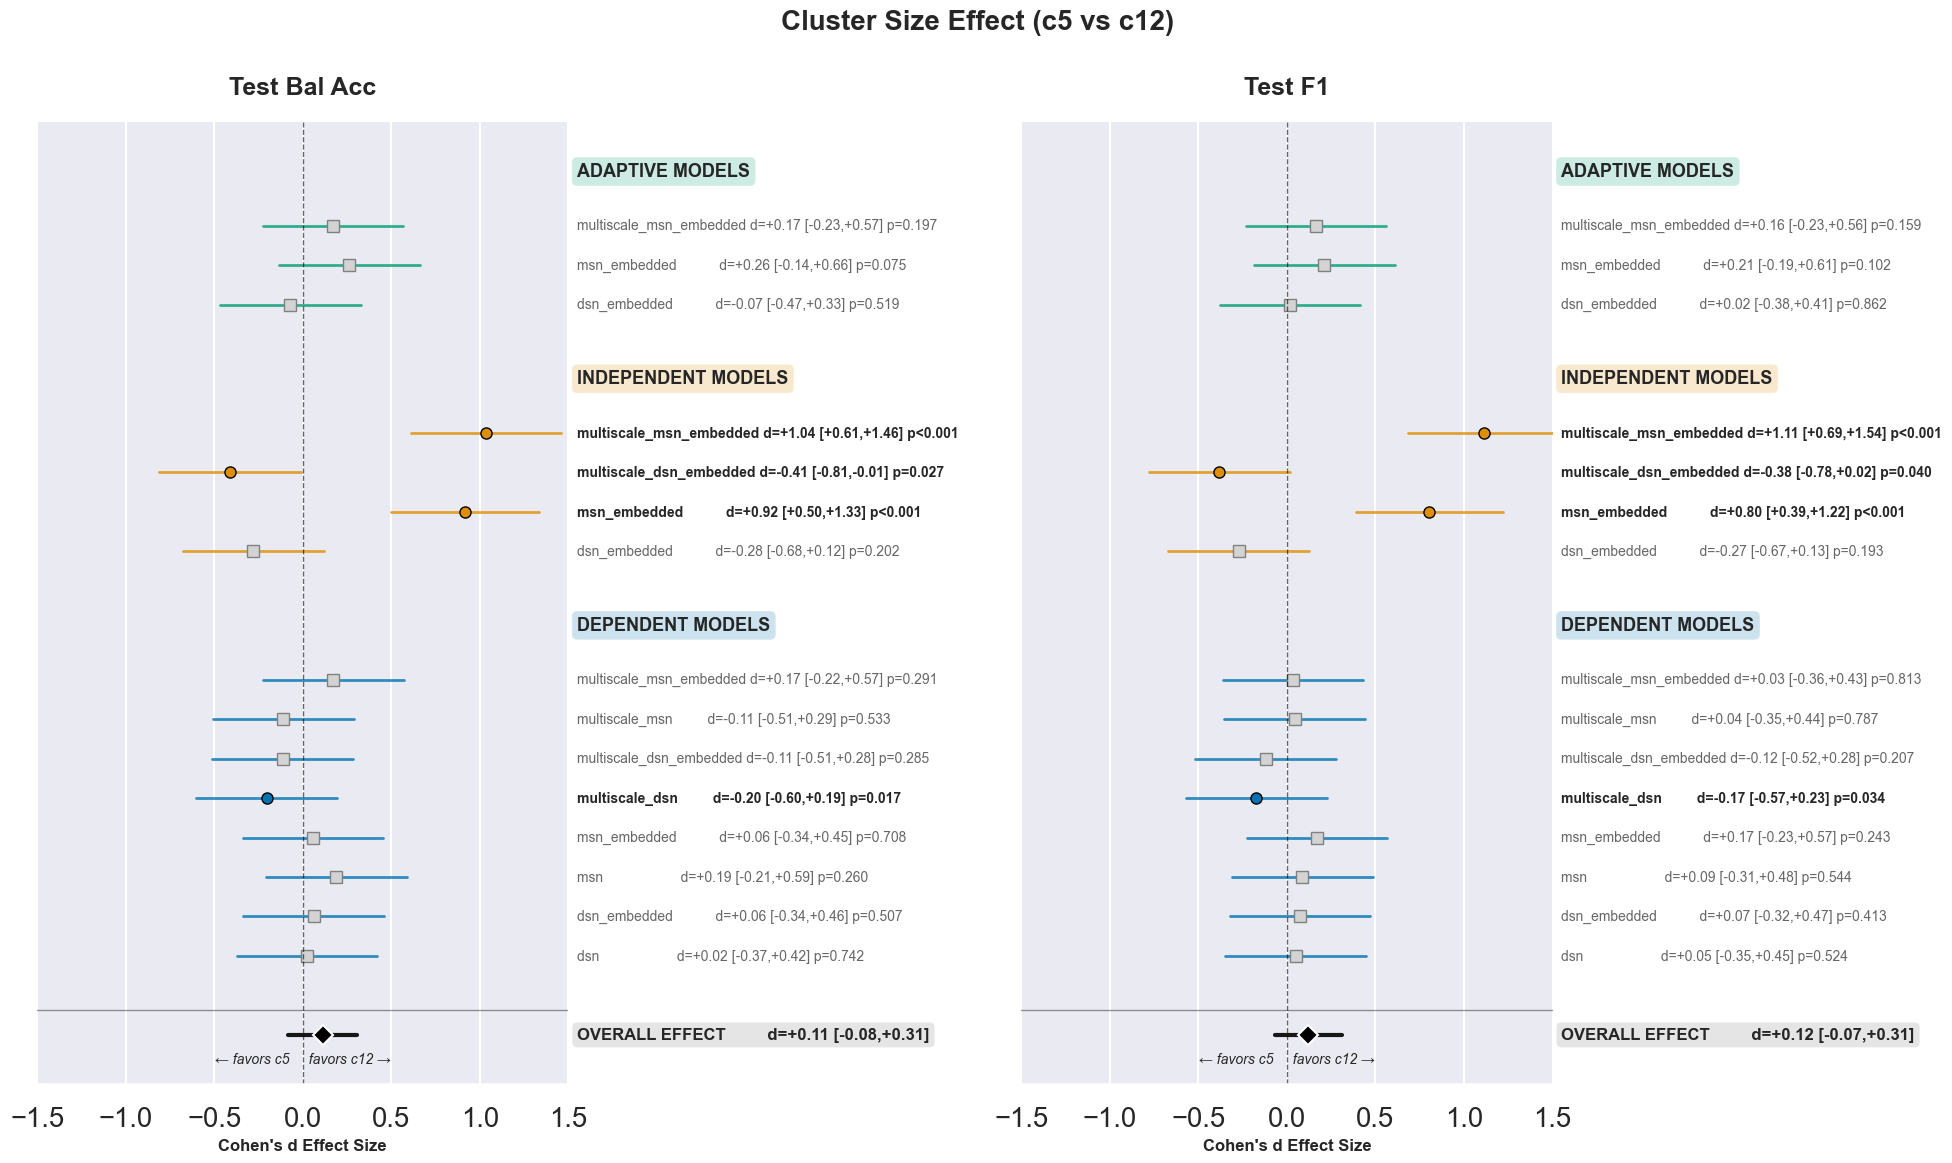

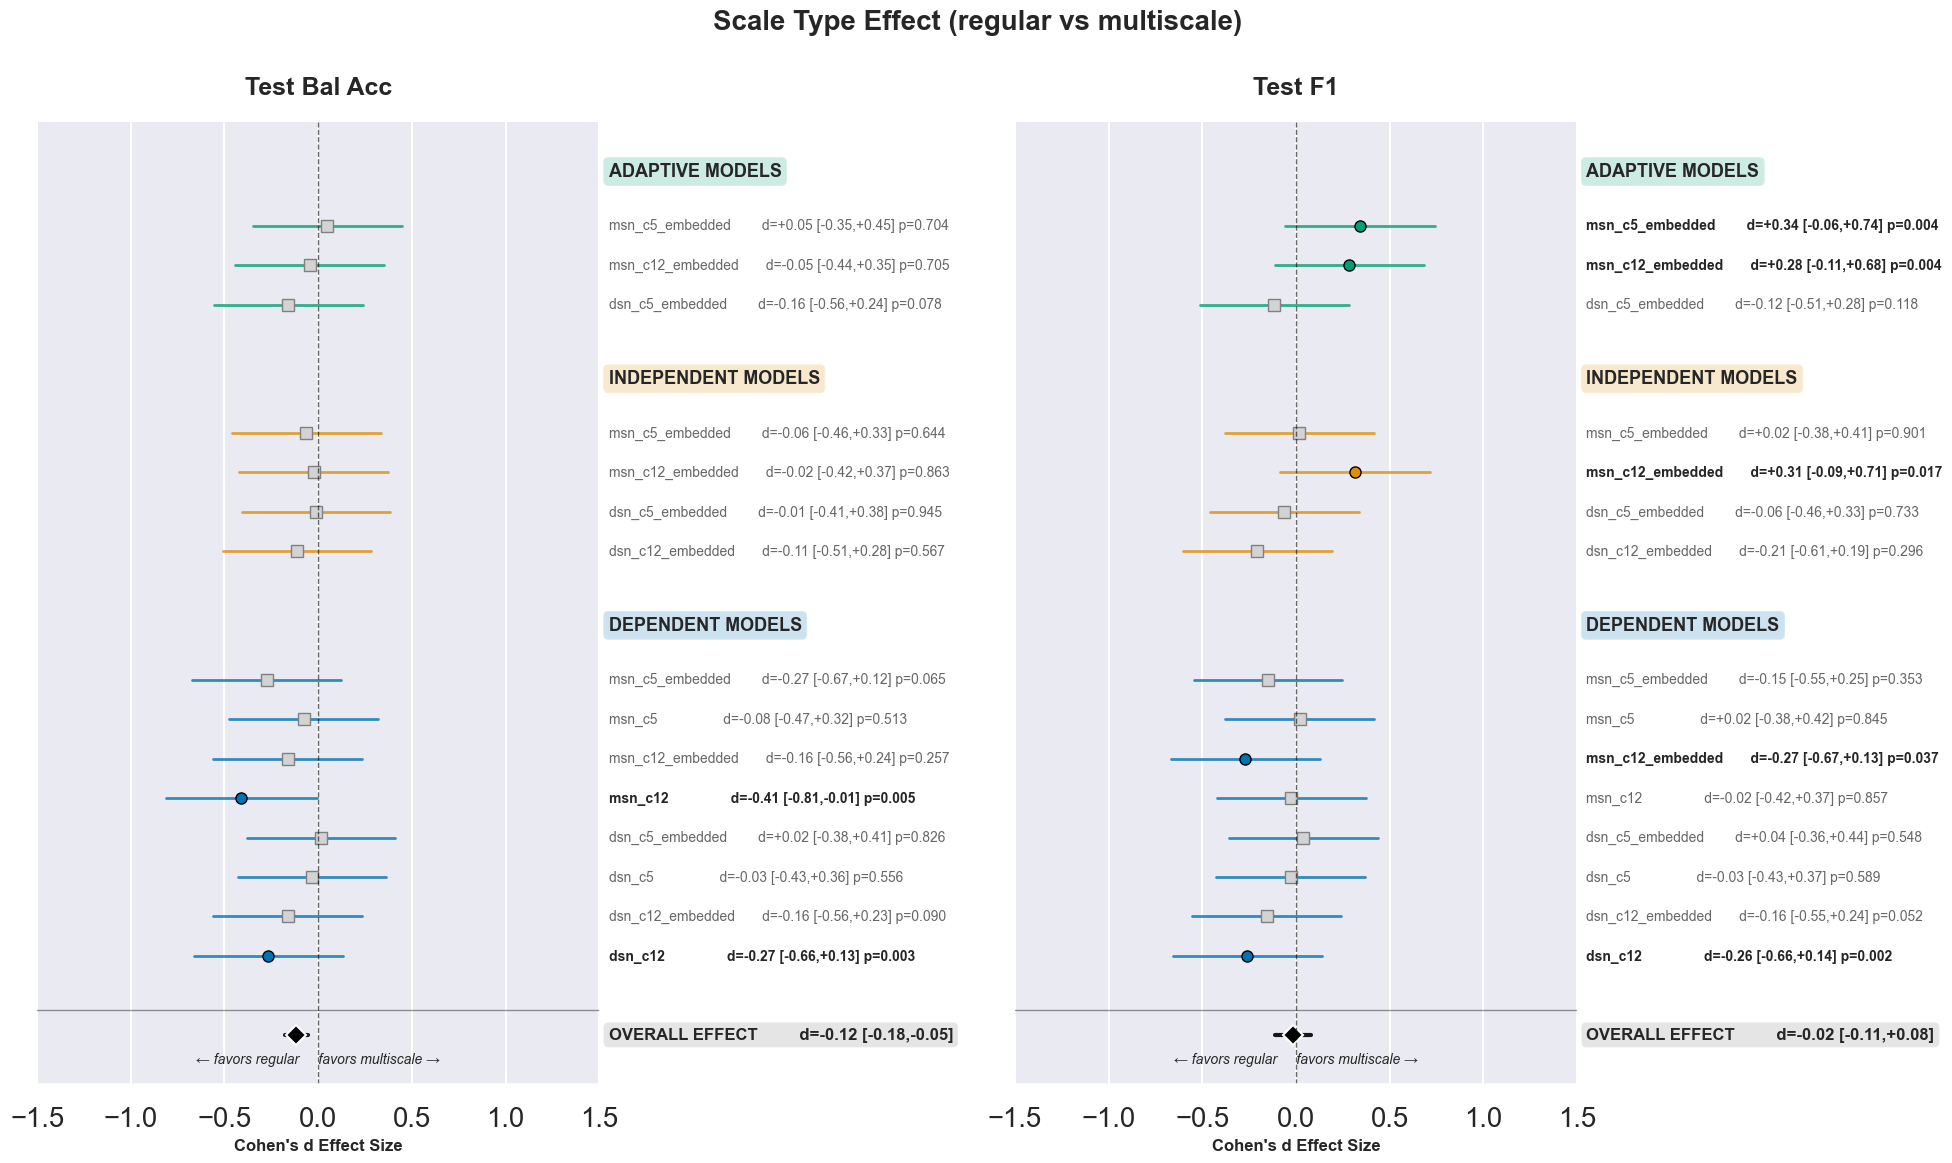

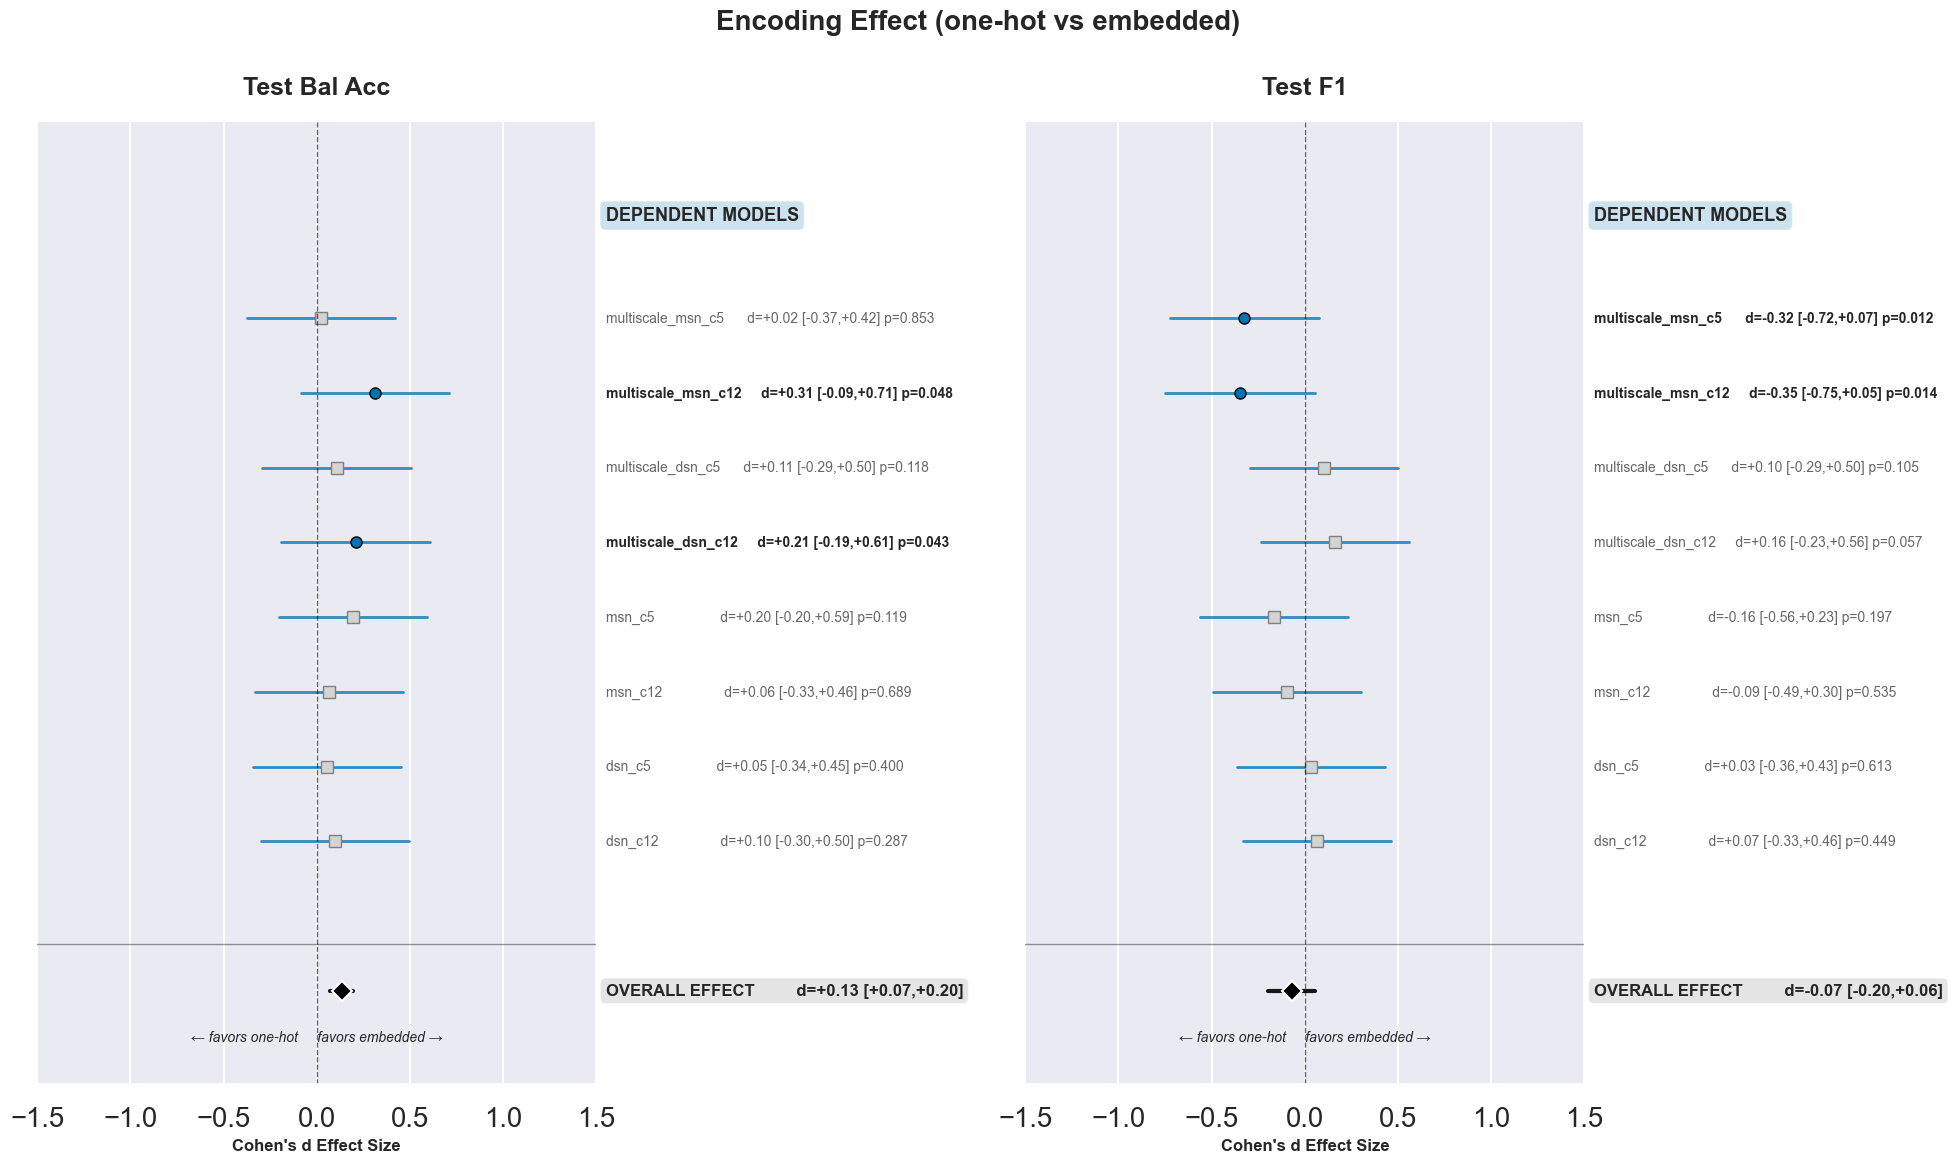

In [17]:
# Quick analysis with defaults
# results = quick_analysis(df, save_dir=stats_output_path)
plot_params = {
    'figsize': (20, 12),           # Bigger plots
    'context': 'talk',           # SNS context (paper/notebook/talk/poster)
    'style': 'darkgrid',          # SNS style
    'font_scale': 1.2,             # Scale all fonts
    'title_fontsize': 18,          # Customize title size
    'xlim': (-1.5, 1.5),              # Wider effect size range
    'show_overall': True,         # Hide overall effect
   'dpi': 600                     # High resolution
}
# Or custom analysis
results = analyze_model_comparisons(
    df, 
    score_types=['test_bal_acc_all', 'test_f1_all'],
    display_metrics='both',  # 'bal_acc', 'f1', or 'both'
    save_dir=stats_output_path,
    plot_params=plot_params
)

# Get high-level summary
summary = get_comparison_summary(results)
print(summary)

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_rel, ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

def perform_pairwise_comparisons_corrected(model_pairs, comparison_type, correction_method='fdr_bh'):
    """
    Enhanced version with multiple comparison corrections
    
    Parameters:
    -----------
    model_pairs : list
        List of model pair dictionaries
    comparison_type : str
        Type of comparison
    correction_method : str
        Method for p-value correction:
        - 'bonferroni': Conservative Bonferroni correction
        - 'fdr_bh': Benjamini-Hochberg (FDR) - recommended
        - 'fdr_by': Benjamini-Yekutieli (more conservative FDR)
        - 'holm': Holm-Bonferroni (less conservative than Bonferroni)
        - None: No correction
    
    Returns:
    --------
    pandas.DataFrame
        Results with corrected p-values
    """
    results = []
    
    # First, collect all raw results
    for pair in model_pairs:
        group1 = pair['condition1_data']
        group2 = pair['condition2_data']
        
        # Perform t-test
        if len(group1) == len(group2):
            t_stat, p_value = ttest_rel(group1, group2)
            test_type = 'paired'
        else:
            t_stat, p_value = ttest_ind(group1, group2)
            test_type = 'independent'
        
        # Calculate effect size
        d = cohen_d(group1, group2)
        ci_lower, ci_upper = cohen_d_ci(d, len(group1), len(group2))
        
        # Create descriptive label (same as your original code)
        if comparison_type == 'cluster':
            subject_type = pair['group_key'][0]
            base_model = pair['group_key'][1]
            is_embedded = pair['group_key'][2]
            is_multiscale = pair['group_key'][3]
            
            label = base_model.lower()
            if is_multiscale:
                label = f"multiscale_{label}"
            if is_embedded:
                label += "_embedded"
                
        elif comparison_type == 'scale':
            subject_type = pair['group_key'][0]
            base_model = pair['group_key'][1]
            cluster_size = pair['group_key'][2]
            is_embedded = pair['group_key'][3]
            
            label = base_model.lower()
            if cluster_size and not pd.isna(cluster_size):
                label += f"_c{int(cluster_size)}"
            if is_embedded:
                label += "_embedded"
                
        elif comparison_type == 'encoding':
            base_model = pair['group_key'][0]
            cluster_size = pair['group_key'][1]
            is_multiscale = pair['group_key'][2]
            
            label = base_model.lower()
            if is_multiscale:
                label = f"multiscale_{label}"
            if cluster_size and not pd.isna(cluster_size):
                label += f"_c{int(cluster_size)}"
        
        results.append({
            'comparison_type': comparison_type,
            'model_label': label,
            'subject_type': pair['group_key'][0] if comparison_type != 'encoding' else 'dependent',
            'condition1': pair['condition1'],
            'condition2': pair['condition2'],
            'n1': len(group1),
            'n2': len(group2),
            'mean1': np.mean(group1),
            'mean2': np.mean(group2),
            'std1': np.std(group1, ddof=1),
            'std2': np.std(group2, ddof=1),
            't_stat': t_stat,
            'p_value_raw': p_value,  # Store raw p-value
            'test_type': test_type,
            'cohens_d': d,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'effect_size_interpretation': 'small' if abs(d) < 0.5 else 'medium' if abs(d) < 0.8 else 'large'
        })
    
    results_df = pd.DataFrame(results)
    
    # Apply multiple comparison correction if requested
    if correction_method and len(results_df) > 1:
        raw_pvals = results_df['p_value_raw'].values
        
        # Perform correction
        rejected, corrected_pvals, alpha_sidak, alpha_bonf = multipletests(
            raw_pvals, 
            alpha=0.05, 
            method=correction_method,
            returnsorted=False
        )
        
        # Add corrected results
        results_df['p_value_corrected'] = corrected_pvals
        results_df['significant_raw'] = raw_pvals < 0.05
        results_df['significant_corrected'] = rejected
        results_df['correction_method'] = correction_method
        
        # Use corrected p-values for final significance
        results_df['p_value'] = corrected_pvals
        results_df['significant'] = rejected
        
        print(f"Applied {correction_method} correction:")
        print(f"  Raw significant: {sum(results_df['significant_raw'])}/{len(results_df)}")
        print(f"  Corrected significant: {sum(results_df['significant_corrected'])}/{len(results_df)}")
        
    else:
        # No correction
        results_df['p_value'] = results_df['p_value_raw']
        results_df['significant'] = results_df['p_value_raw'] < 0.05
        results_df['p_value_corrected'] = results_df['p_value_raw']
        results_df['significant_raw'] = results_df['significant']
        results_df['significant_corrected'] = results_df['significant']
        results_df['correction_method'] = 'none'
    
    return results_df

def perform_omnibus_anova(long_df, comparison_type):
    """
    Perform omnibus ANOVA test before pairwise comparisons
    
    Parameters:
    -----------
    long_df : pandas.DataFrame
        Long-format data
    comparison_type : str
        Type of comparison
    
    Returns:
    --------
    dict
        ANOVA results
    """
    
    # Remove missing values
    clean_df = long_df.dropna(subset=['score', 'condition'])
    
    if len(clean_df) < 3:
        return {'error': 'Insufficient data for ANOVA'}
    
    # Check if we have multiple conditions
    conditions = clean_df['condition'].unique()
    if len(conditions) < 2:
        return {'error': 'Need at least 2 conditions for ANOVA'}
    
    try:
        # Fit ANOVA model
        if comparison_type in ['cluster', 'scale']:
            # Include subject_type as a factor
            formula = 'score ~ C(condition) + C(subject_type) + C(condition):C(subject_type)'
        else:
            # Encoding only has dependent subjects
            formula = 'score ~ C(condition)'
        
        model = ols(formula, data=clean_df).fit()
        anova_results = anova_lm(model, typ=2)
        
        return {
            'anova_table': anova_results,
            'model': model,
            'formula': formula,
            'n_observations': len(clean_df),
            'conditions': list(conditions)
        }
        
    except Exception as e:
        return {'error': f'ANOVA failed: {str(e)}'}

def get_correction_recommendations(n_comparisons, comparison_type):
    """
    Get recommendations for multiple comparison corrections
    
    Parameters:
    -----------
    n_comparisons : int
        Number of pairwise comparisons
    comparison_type : str
        Type of comparison
    
    Returns:
    --------
    dict
        Recommendations
    """
    
    recommendations = {
        'n_comparisons': n_comparisons,
        'family_wise_error_rate': 1 - (0.95 ** n_comparisons),
        'recommendations': []
    }
    
    if n_comparisons <= 3:
        recommendations['recommendations'].append(
            "Few comparisons - could use uncorrected p-values, but FDR still recommended"
        )
        recommendations['suggested_method'] = 'fdr_bh'
        
    elif n_comparisons <= 10:
        recommendations['recommendations'].append(
            "Moderate number of comparisons - FDR correction recommended"
        )
        recommendations['suggested_method'] = 'fdr_bh'
        
    else:
        recommendations['recommendations'].append(
            "Many comparisons - strong correction needed"
        )
        recommendations['suggested_method'] = 'fdr_bh'
    
    # Method explanations
    recommendations['method_explanations'] = {
        'fdr_bh': 'Benjamini-Hochberg (controls false discovery rate) - RECOMMENDED',
        'bonferroni': 'Very conservative, controls family-wise error rate',
        'holm': 'Less conservative than Bonferroni, controls family-wise error rate',
        'fdr_by': 'More conservative FDR, for dependent tests',
        'none': 'No correction - only use with very few planned comparisons'
    }
    
    return recommendations

def analyze_with_proper_corrections(df, score_types=['test_bal_acc_all', 'test_f1_all'], 
                                  correction_method='fdr_bh', save_dir='./corrected_results/'):
    """
    Perform analysis with proper statistical corrections
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Results dataframe
    score_types : list
        Score types to analyze
    correction_method : str
        Correction method ('fdr_bh', 'bonferroni', 'holm', 'fdr_by', None)
    save_dir : str
        Directory to save results
    
    Returns:
    --------
    dict
        Enhanced results with corrections
    """
    
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    comparison_types = ['cluster', 'scale', 'encoding']
    results = {}
    
    print("🚀 Starting Enhanced Statistical Analysis with Corrections")
    print("=" * 60)
    print(f"Correction method: {correction_method}")
    
    # Collect all p-values for global correction if desired
    all_raw_pvals = []
    all_comparison_info = []
    
    for comparison_type in comparison_types:
        print(f"\n📊 Analyzing {comparison_type.title()} Comparisons...")
        results[comparison_type] = {}
        
        for score_type in score_types:
            print(f"   Processing {score_type}...")
            
            # Prepare data (using your existing function)
            long_data = prepare_comparison_data(df, score_type, comparison_type)
            
            if len(long_data) == 0:
                continue
            
            # Perform omnibus ANOVA first
            anova_results = perform_omnibus_anova(long_data, comparison_type)
            
            # Create model pairs (using your existing function)  
            model_pairs = create_model_pairs(long_data, comparison_type)
            
            if len(model_pairs) == 0:
                continue
            
            # Get correction recommendations
            recommendations = get_correction_recommendations(len(model_pairs), comparison_type)
            
            # Perform corrected pairwise comparisons
            comparison_results = perform_pairwise_comparisons_corrected(
                model_pairs, comparison_type, correction_method
            )
            
            # Store for potential global correction
            for _, row in comparison_results.iterrows():
                all_raw_pvals.append(row['p_value_raw'])
                all_comparison_info.append({
                    'comparison_type': comparison_type,
                    'score_type': score_type,
                    'model_label': row['model_label']
                })
            
            # Save detailed results
            results[comparison_type][score_type] = {
                'pairwise_results': comparison_results,
                'anova_results': anova_results,
                'recommendations': recommendations,
                'n_comparisons': len(comparison_results),
                'n_significant_raw': sum(comparison_results['significant_raw']),
                'n_significant_corrected': sum(comparison_results['significant_corrected'])
            }
            
            # Save to CSV
            csv_filename = f"{comparison_type}_{score_type}_corrected_results.csv"
            csv_path = os.path.join(save_dir, csv_filename)
            comparison_results.to_csv(csv_path, index=False)
    
    # Option for global correction across ALL comparisons
    if len(all_raw_pvals) > 0:
        print(f"\n🌐 Global Correction Across All {len(all_raw_pvals)} Comparisons:")
        
        rejected_global, corrected_pvals_global, _, _ = multipletests(
            all_raw_pvals, alpha=0.05, method=correction_method, returnsorted=False
        )
        
        print(f"   Raw significant: {sum(np.array(all_raw_pvals) < 0.05)}/{len(all_raw_pvals)}")
        print(f"   Global corrected significant: {sum(rejected_global)}/{len(all_raw_pvals)}")
        
        # Save global correction results
        global_results = pd.DataFrame({
            'comparison_type': [info['comparison_type'] for info in all_comparison_info],
            'score_type': [info['score_type'] for info in all_comparison_info],
            'model_label': [info['model_label'] for info in all_comparison_info],
            'p_value_raw': all_raw_pvals,
            'p_value_global_corrected': corrected_pvals_global,
            'significant_raw': np.array(all_raw_pvals) < 0.05,
            'significant_global_corrected': rejected_global
        })
        
        global_csv_path = os.path.join(save_dir, 'global_correction_results.csv')
        global_results.to_csv(global_csv_path, index=False)
        
        results['global_correction'] = global_results
    
    print(f"\n💾 Enhanced results saved to: {save_dir}")
    
    return results

# Helper function for Cohen's d (you already have these)
def cohen_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * np.var(group1, ddof=1) + (n2 - 1) * np.var(group2, ddof=1)) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

def cohen_d_ci(d, n1, n2, confidence=0.95):
    """Calculate confidence interval for Cohen's d"""
    se = np.sqrt((n1 + n2) / (n1 * n2) + d**2 / (2 * (n1 + n2)))
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, n1 + n2 - 2)
    ci_lower = d - t_crit * se
    ci_upper = d + t_crit * se
    return ci_lower, ci_upper

# You'll need to include your existing prepare_comparison_data and create_model_pairs functions here

In [19]:
proper_analysis = analyze_with_proper_corrections(df, score_types=['test_bal_acc_all', 'test_f1_all'], 
                                  correction_method='fdr_bh', save_dir=stats_output_path)

🚀 Starting Enhanced Statistical Analysis with Corrections
Correction method: fdr_bh

📊 Analyzing Cluster Comparisons...
   Processing test_bal_acc_all...
Applied fdr_bh correction:
  Raw significant: 4/15
  Corrected significant: 2/15
   Processing test_f1_all...
Applied fdr_bh correction:
  Raw significant: 4/15
  Corrected significant: 2/15

📊 Analyzing Scale Comparisons...
   Processing test_bal_acc_all...
Applied fdr_bh correction:
  Raw significant: 2/15
  Corrected significant: 2/15
   Processing test_f1_all...
Applied fdr_bh correction:
  Raw significant: 5/15
  Corrected significant: 3/15

📊 Analyzing Encoding Comparisons...
   Processing test_bal_acc_all...
Applied fdr_bh correction:
  Raw significant: 2/8
  Corrected significant: 0/8
   Processing test_f1_all...
Applied fdr_bh correction:
  Raw significant: 2/8
  Corrected significant: 0/8

🌐 Global Correction Across All 76 Comparisons:
   Raw significant: 19/76
   Global corrected significant: 9/76

💾 Enhanced results saved 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set consistent color mapping for subject types
SUBJECT_TYPE_COLORS = {
    'dependent': '#1f77b4',     # Blue
    'independent': '#ff7f0e',   # Orange  
    'adaptive': '#2ca02c',      # Green
    'embedded': '#1f77b4'       # Same as dependent (blue)
}

SUBJECT_TYPE_ORDER = ['dependent', 'independent', 'adaptive']

def calculate_overall_effect(results_df, method='fixed'):
    """
    Calculate overall effect with proper meta-analytic methods
    
    Parameters:
    -----------
    results_df : pandas.DataFrame
        Dataframe with individual study results
    method : str
        'fixed' for fixed-effects or 'random' for random-effects
    
    Returns:
    --------
    dict
        Overall effect statistics
    """
    if len(results_df) <= 1:
        return None
    
    # Extract effect sizes and sample sizes
    d_values = results_df['cohens_d'].values
    n1_values = results_df['n1'].values
    n2_values = results_df['n2'].values
    
    # Calculate variance for each effect size
    variances = []
    for d, n1, n2 in zip(d_values, n1_values, n2_values):
        # Variance of Cohen's d
        var_d = (n1 + n2) / (n1 * n2) + d**2 / (2 * (n1 + n2))
        variances.append(var_d)
    
    variances = np.array(variances)
    weights = 1 / variances  # Inverse variance weights
    
    if method == 'fixed':
        # Fixed-effects meta-analysis
        overall_d = np.sum(weights * d_values) / np.sum(weights)
        overall_var = 1 / np.sum(weights)
        overall_se = np.sqrt(overall_var)
        
        # Calculate Q statistic for heterogeneity
        Q = np.sum(weights * (d_values - overall_d)**2)
        df_Q = len(d_values) - 1
        p_heterogeneity = 1 - stats.chi2.cdf(Q, df_Q) if df_Q > 0 else 1.0
        
        # I² statistic
        I2 = max(0, (Q - df_Q) / Q) if Q > 0 else 0
        
    else:  # random effects
        # Calculate between-study variance (tau²)
        Q = np.sum(weights * (d_values - np.sum(weights * d_values) / np.sum(weights))**2)
        df_Q = len(d_values) - 1
        
        if df_Q > 0 and Q > df_Q:
            tau2 = (Q - df_Q) / (np.sum(weights) - np.sum(weights**2) / np.sum(weights))
        else:
            tau2 = 0
        
        # Adjust weights for random effects
        weights_re = 1 / (variances + tau2)
        overall_d = np.sum(weights_re * d_values) / np.sum(weights_re)
        overall_var = 1 / np.sum(weights_re)
        overall_se = np.sqrt(overall_var)
        
        p_heterogeneity = 1 - stats.chi2.cdf(Q, df_Q) if df_Q > 0 else 1.0
        I2 = max(0, (Q - df_Q) / Q) if Q > 0 else 0
    
    # Confidence interval
    ci_lower = overall_d - 1.96 * overall_se
    ci_upper = overall_d + 1.96 * overall_se
    
    # Z-test for overall effect
    z_stat = overall_d / overall_se
    p_overall = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    return {
        'overall_d': overall_d,
        'overall_se': overall_se,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'z_stat': z_stat,
        'p_value': p_overall,
        'Q_stat': Q if 'Q' in locals() else 0,
        'p_heterogeneity': p_heterogeneity,
        'I2': I2,
        'tau2': tau2 if method == 'random' else 0,
        'method': method,
        'n_studies': len(d_values)
    }

def create_enhanced_forest_plot(results_dict, score_type='test_bal_acc_all', 
                               comparison_type='cluster', figsize=(14, 10), 
                               save_path=None, meta_method='fixed'):
    """
    Create enhanced forest plot with subject types and proper overall effects
    
    Parameters:
    -----------
    results_dict : dict
        Results from analyze_with_proper_corrections()
    score_type : str
        Score type to plot
    comparison_type : str
        Type of comparison ('cluster', 'scale', 'encoding')
    figsize : tuple
        Figure size
    save_path : str
        Path to save figure
    meta_method : str
        'fixed' or 'random' for meta-analysis method
    """
    
    # Import scipy.stats for the overall effect calculation
    from scipy import stats
    
    if comparison_type not in results_dict or score_type not in results_dict[comparison_type]:
        print(f"No data found for {comparison_type} - {score_type}")
        return None
    
    df = results_dict[comparison_type][score_type]['pairwise_results']
    
    if len(df) == 0:
        print(f"No results to plot for {comparison_type} - {score_type}")
        return None
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get subject types in order
    if comparison_type == 'encoding':
        subject_types_present = ['dependent']  # Only dependent for encoding
        df = df.copy()
        df['subject_type'] = 'dependent'  # Ensure consistent labeling
    else:
        available_types = set(df['subject_type'].unique())
        subject_types_present = [st for st in SUBJECT_TYPE_ORDER if st in available_types]
    
    # Calculate positions (working from top to bottom)
    y_pos = 0
    y_labels = []
    y_positions = []
    section_data = {}  # Store data for each section
    
    model_spacing = 1.0
    section_spacing = 1.5
    header_spacing = 0.8
    
    max_y = 0
    
    # First pass: calculate total height and collect section data
    for subject_type in subject_types_present:
        subset = df[df['subject_type'] == subject_type]
        if len(subset) == 0:
            continue
        
        subset_sorted = subset.sort_values('cohens_d', ascending=True)
        section_data[subject_type] = subset_sorted
        max_y += len(subset_sorted) * model_spacing + header_spacing + section_spacing
    
    # Add space for overall effect
    overall_space = 2.5
    max_y += overall_space
    
    # Start plotting from the top
    current_y = max_y
    
    # Plot each subject type section
    all_effects_for_overall = []  # Collect all effects for overall calculation
    
    for subject_type in subject_types_present:
        if subject_type not in section_data:
            continue
            
        subset_sorted = section_data[subject_type]
        color = SUBJECT_TYPE_COLORS[subject_type]
        
        # Move up for header
        current_y -= header_spacing
        
        # Add subject type header
        header_text = f"{subject_type.upper()} MODELS"
        ax.text(-1.8, current_y, header_text, 
               fontweight='bold', fontsize=12, ha='left', va='center',
               bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
        
        # Plot models in this section
        for _, row in subset_sorted.iterrows():
            current_y -= model_spacing
            
            # Store effect data for overall calculation
            all_effects_for_overall.append(row)
            
            # Plot confidence interval
            ax.plot([row['ci_lower'], row['ci_upper']], [current_y, current_y], 
                   color=color, linewidth=2.5, alpha=0.8)
            
            # Plot point estimate
            marker_color = color if row['significant_corrected'] else 'lightgray'
            marker_edge_color = 'black' if row['significant_corrected'] else 'gray'
            marker = 'o' if row['significant_corrected'] else 's'
            
            ax.plot(row['cohens_d'], current_y, marker, color=marker_color, 
                   markersize=10, markeredgecolor=marker_edge_color, markeredgewidth=1.5)
            
            # Add model label and statistics
            p_text = f"p={row['p_value_corrected']:.3f}" if row['p_value_corrected'] >= 0.001 else "p<0.001"
            label = f"{row['model_label']}"
            stats_text = f"d={row['cohens_d']:+.3f} [{row['ci_lower']:+.3f}, {row['ci_upper']:+.3f}], {p_text}"
            
            # Model name on the left
            ax.text(-1.8, current_y, label, ha='left', va='center', fontsize=10, 
                   fontweight='bold' if row['significant_corrected'] else 'normal')
            
            # Statistics on the right
            ax.text(1.6, current_y, stats_text, ha='left', va='center', fontsize=9,
                   fontweight='bold' if row['significant_corrected'] else 'normal',
                   alpha=1.0 if row['significant_corrected'] else 0.7)
            
            y_positions.append(current_y)
            y_labels.append(label)
        
        # Add section spacing
        current_y -= section_spacing
    
    # Calculate and plot overall effect
    if len(all_effects_for_overall) > 1:
        overall_df = pd.DataFrame(all_effects_for_overall)
        overall_result = calculate_overall_effect(overall_df, method=meta_method)
        
        if overall_result:
            # Add separator line
            current_y -= 0.5
            ax.axhline(y=current_y + 0.3, xmin=0.1, xmax=0.9, color='black', 
                      linestyle='-', alpha=0.4, linewidth=1.5)
            current_y -= 0.8
            
            # Plot overall effect
            overall_color = 'black'
            ax.plot([overall_result['ci_lower'], overall_result['ci_upper']], 
                   [current_y, current_y], color=overall_color, linewidth=3, alpha=0.9)
            
            # Overall effect marker (diamond)
            ax.plot(overall_result['overall_d'], current_y, 'D', color=overall_color, 
                   markersize=12, markeredgecolor='white', markeredgewidth=2)
            
            # Overall effect labels
            overall_label = "OVERALL EFFECT"
            p_text_overall = f"p={overall_result['p_value']:.3f}" if overall_result['p_value'] >= 0.001 else "p<0.001"
            overall_stats = (f"d={overall_result['overall_d']:+.3f} "
                           f"[{overall_result['ci_lower']:+.3f}, {overall_result['ci_upper']:+.3f}], "
                           f"{p_text_overall}")
            
            ax.text(-1.8, current_y, overall_label, ha='left', va='center', 
                   fontsize=11, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.1))
            
            ax.text(1.6, current_y, overall_stats, ha='left', va='center', 
                   fontsize=10, fontweight='bold')
            
            # Add heterogeneity info
            current_y -= 0.6
            hetero_text = (f"Heterogeneity: I² = {overall_result['I2']:.1%}, "
                          f"Q = {overall_result['Q_stat']:.2f}, "
                          f"p = {overall_result['p_heterogeneity']:.3f}")
            ax.text(0, current_y, hetero_text, ha='center', va='center', 
                   fontsize=9, style='italic', alpha=0.7)
    
    # Customize plot
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.6, linewidth=1)
    
    # Add effect size reference lines
    for threshold, style in [(0.2, ':'), (0.5, '--'), (0.8, '--')]:
        ax.axvline(threshold, color='gray', linestyle=style, alpha=0.3)
        ax.axvline(-threshold, color='gray', linestyle=style, alpha=0.3)
    
    # Set limits and labels
    ax.set_xlim(-2.0, 3.5)
    ax.set_ylim(current_y - 1, max_y + 0.5)
    
    # Labels and title
    ax.set_xlabel("Cohen's d Effect Size", fontsize=12, fontweight='bold')
    
    # Title based on comparison type
    if comparison_type == 'cluster':
        direction_text = "← favors smaller clusters     favors larger clusters →"
        main_title = f"Cluster Size Effect"
    elif comparison_type == 'scale':
        direction_text = "← favors regular     favors multiscale →"
        main_title = f"Scale Type Effect"
    elif comparison_type == 'encoding':
        direction_text = "← favors one-hot     favors embedded →"
        main_title = f"Encoding Effect"
    
    score_name = score_type.replace('_all', '').replace('_', ' ').title()
    title = f"{main_title} - {score_name}"
    
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Add direction labels
    ax.text(0, current_y - 0.5, direction_text, ha='center', va='center', 
           fontsize=10, style='italic', alpha=0.7)
    
    # Add effect size magnitude labels
    ax.text(0.2, max_y + 0.2, 'small', ha='center', va='bottom', 
           fontsize=8, alpha=0.6, rotation=90)
    ax.text(0.5, max_y + 0.2, 'medium', ha='center', va='bottom', 
           fontsize=8, alpha=0.6, rotation=90)
    ax.text(0.8, max_y + 0.2, 'large', ha='center', va='bottom', 
           fontsize=8, alpha=0.6, rotation=90)
    
    # Remove y-axis elements
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Add subtle grid
    ax.grid(True, alpha=0.2, axis='x')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Enhanced forest plot saved to: {save_path}")
    
    return fig

def plot_all_enhanced_forest_plots(results_dict, save_dir='./enhanced_plots/', 
                                  meta_method='fixed'):
    """
    Generate enhanced forest plots for all comparisons and score types
    
    Parameters:
    -----------
    results_dict : dict
        Results from analyze_with_proper_corrections()
    save_dir : str
        Directory to save plots
    meta_method : str
        'fixed' or 'random' for meta-analysis
    """
    
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    print("🎨 Generating enhanced forest plots with subject types and overall effects...")
    
    comparison_types = ['cluster', 'scale', 'encoding']
    score_types = ['test_bal_acc_all', 'test_f1_all']
    
    for comparison_type in comparison_types:
        if comparison_type not in results_dict:
            continue
            
        for score_type in score_types:
            if score_type not in results_dict[comparison_type]:
                continue
                
            print(f"   📊 Creating {comparison_type} - {score_type} plot...")
            
            fig = create_enhanced_forest_plot(
                results_dict, 
                score_type=score_type,
                comparison_type=comparison_type,
                figsize=(14, 10),
                save_path=f"{save_dir}/enhanced_forest_{comparison_type}_{score_type}.png",
                meta_method=meta_method
            )
            
            if fig:
                plt.show()
                plt.close(fig)
    
    print(f"✅ All enhanced forest plots saved to: {save_dir}")

# Usage example:
"""
# After running your statistical analysis:
results = analyze_with_proper_corrections(df, correction_method='fdr_bh')

# Generate enhanced forest plots:
plot_all_enhanced_forest_plots(results, save_dir='./my_enhanced_plots/')

# Or create individual plot:
fig = create_enhanced_forest_plot(
    results, 
    score_type='test_bal_acc_all',
    comparison_type='cluster',
    meta_method='fixed'  # or 'random'
)
"""

"\n# After running your statistical analysis:\nresults = analyze_with_proper_corrections(df, correction_method='fdr_bh')\n\n# Generate enhanced forest plots:\nplot_all_enhanced_forest_plots(results, save_dir='./my_enhanced_plots/')\n\n# Or create individual plot:\nfig = create_enhanced_forest_plot(\n    results, \n    score_type='test_bal_acc_all',\n    comparison_type='cluster',\n    meta_method='fixed'  # or 'random'\n)\n"

🎨 Generating enhanced forest plots with subject types and overall effects...
   📊 Creating cluster - test_bal_acc_all plot...
Enhanced forest plot saved to: ./enhanced_plots//enhanced_forest_cluster_test_bal_acc_all.png


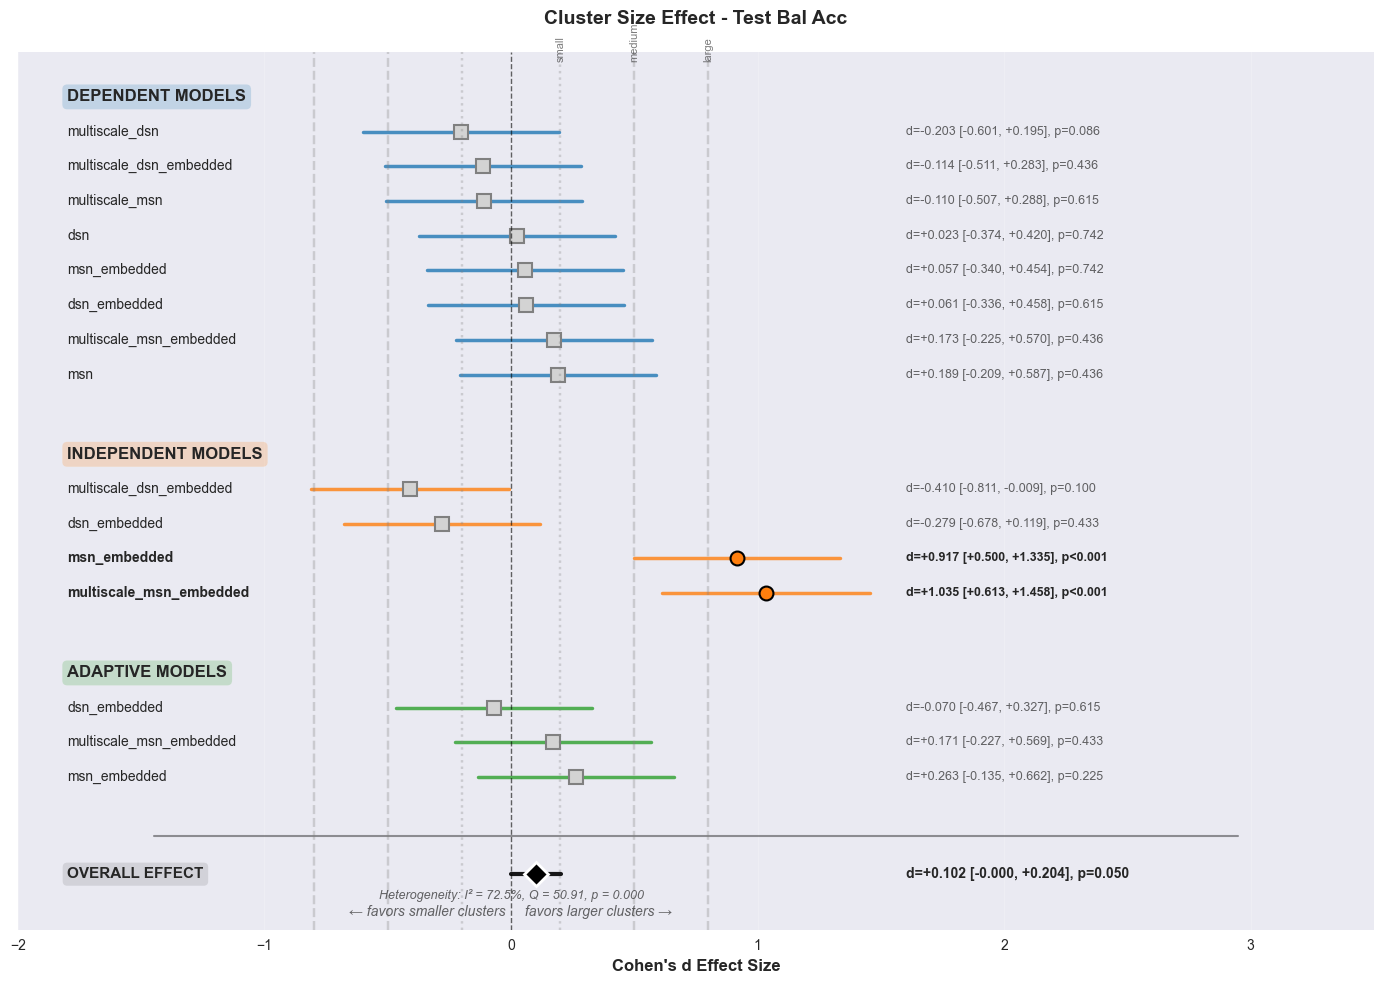

   📊 Creating cluster - test_f1_all plot...
Enhanced forest plot saved to: ./enhanced_plots//enhanced_forest_cluster_test_f1_all.png


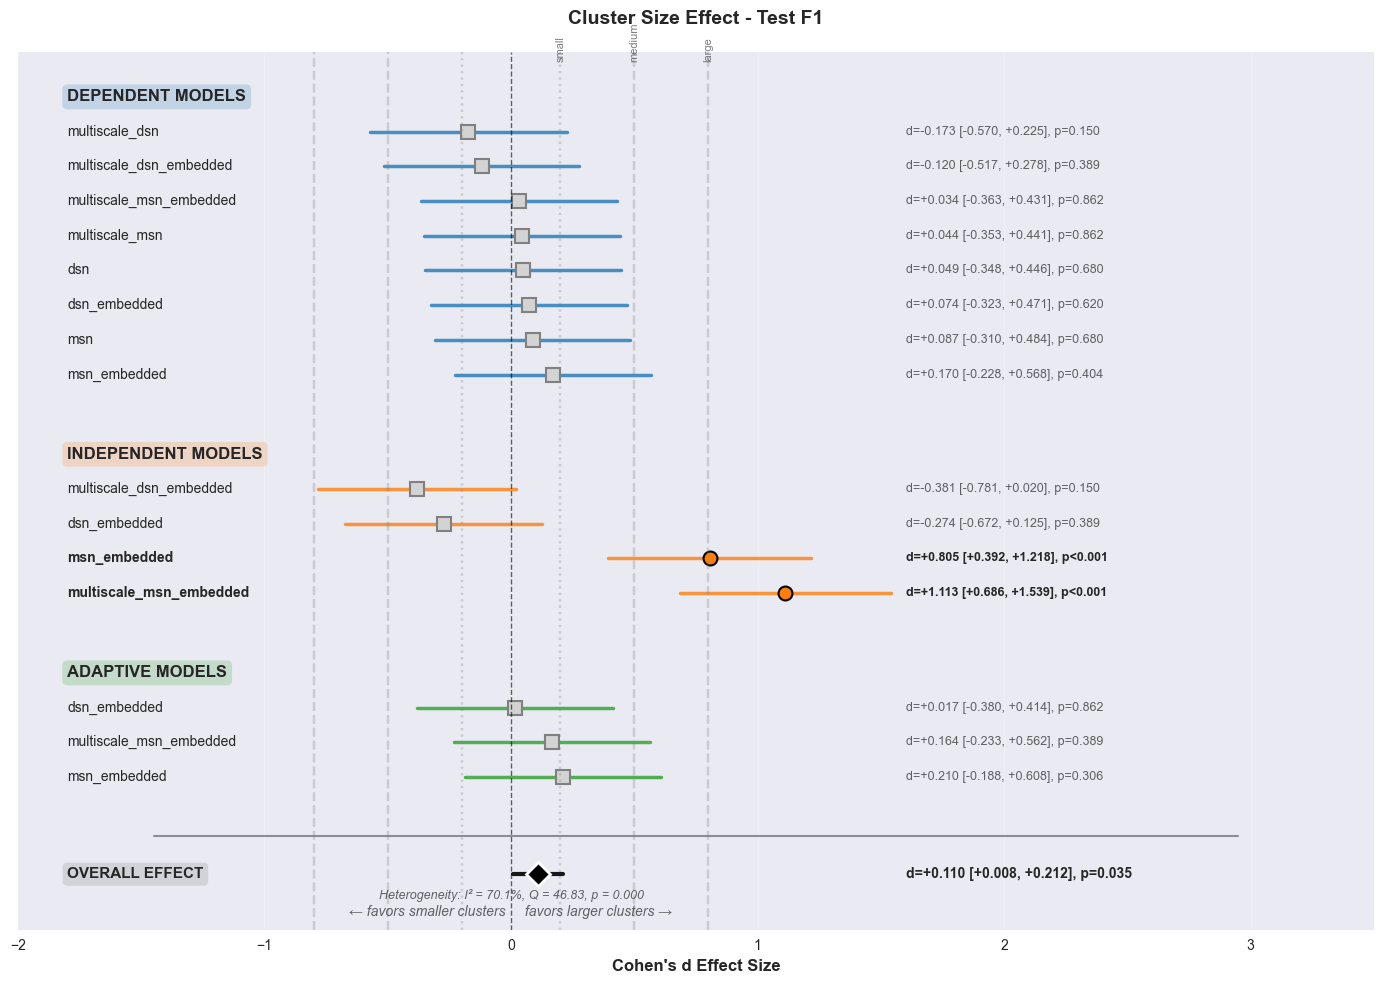

   📊 Creating scale - test_bal_acc_all plot...
Enhanced forest plot saved to: ./enhanced_plots//enhanced_forest_scale_test_bal_acc_all.png


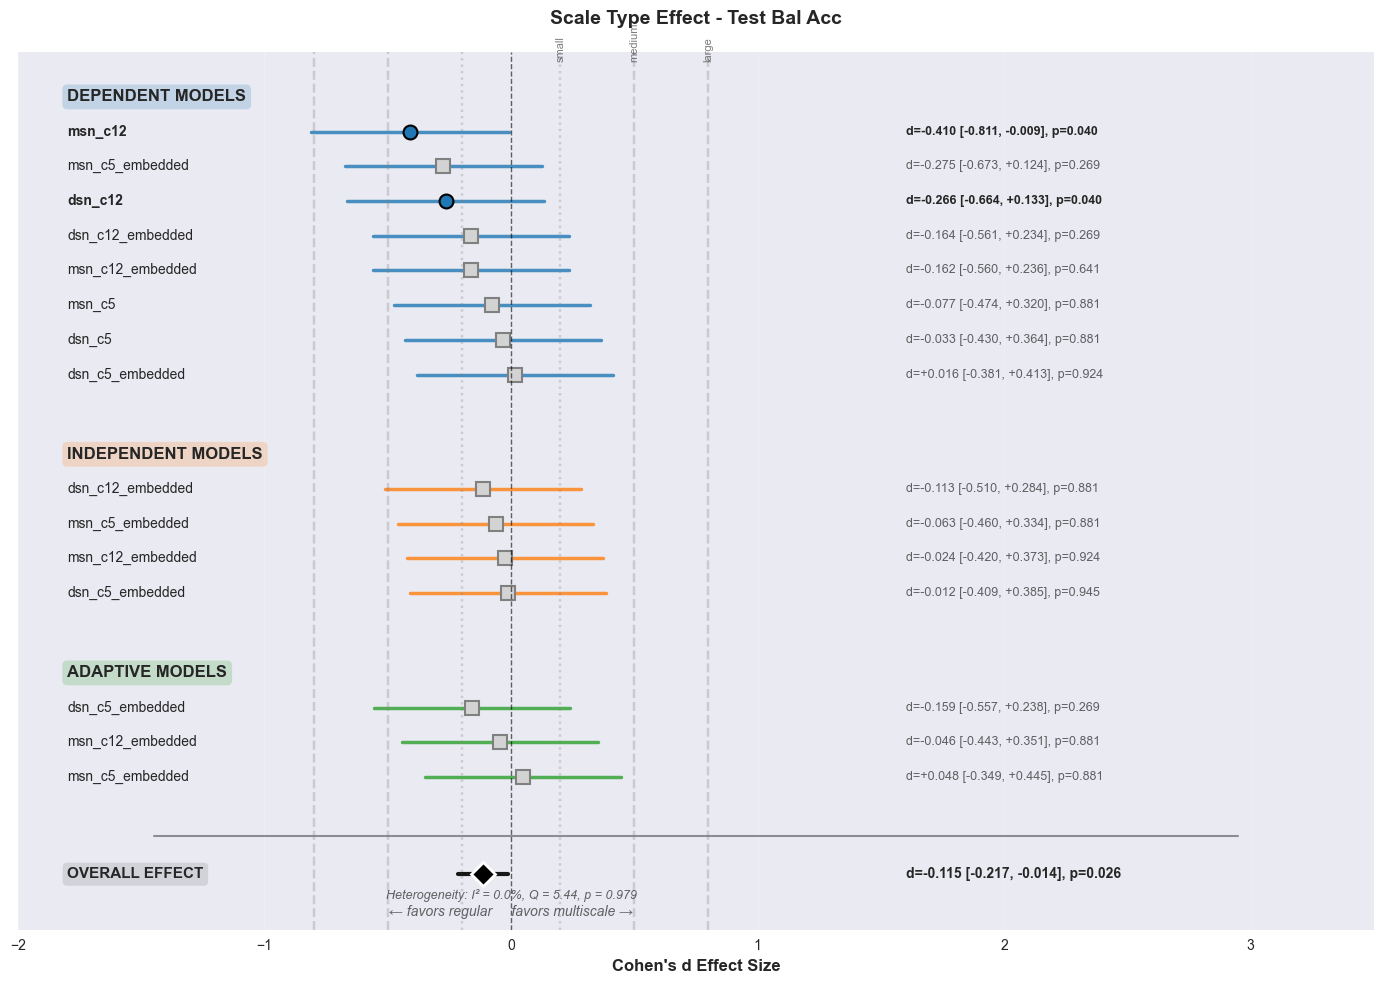

   📊 Creating scale - test_f1_all plot...
Enhanced forest plot saved to: ./enhanced_plots//enhanced_forest_scale_test_f1_all.png


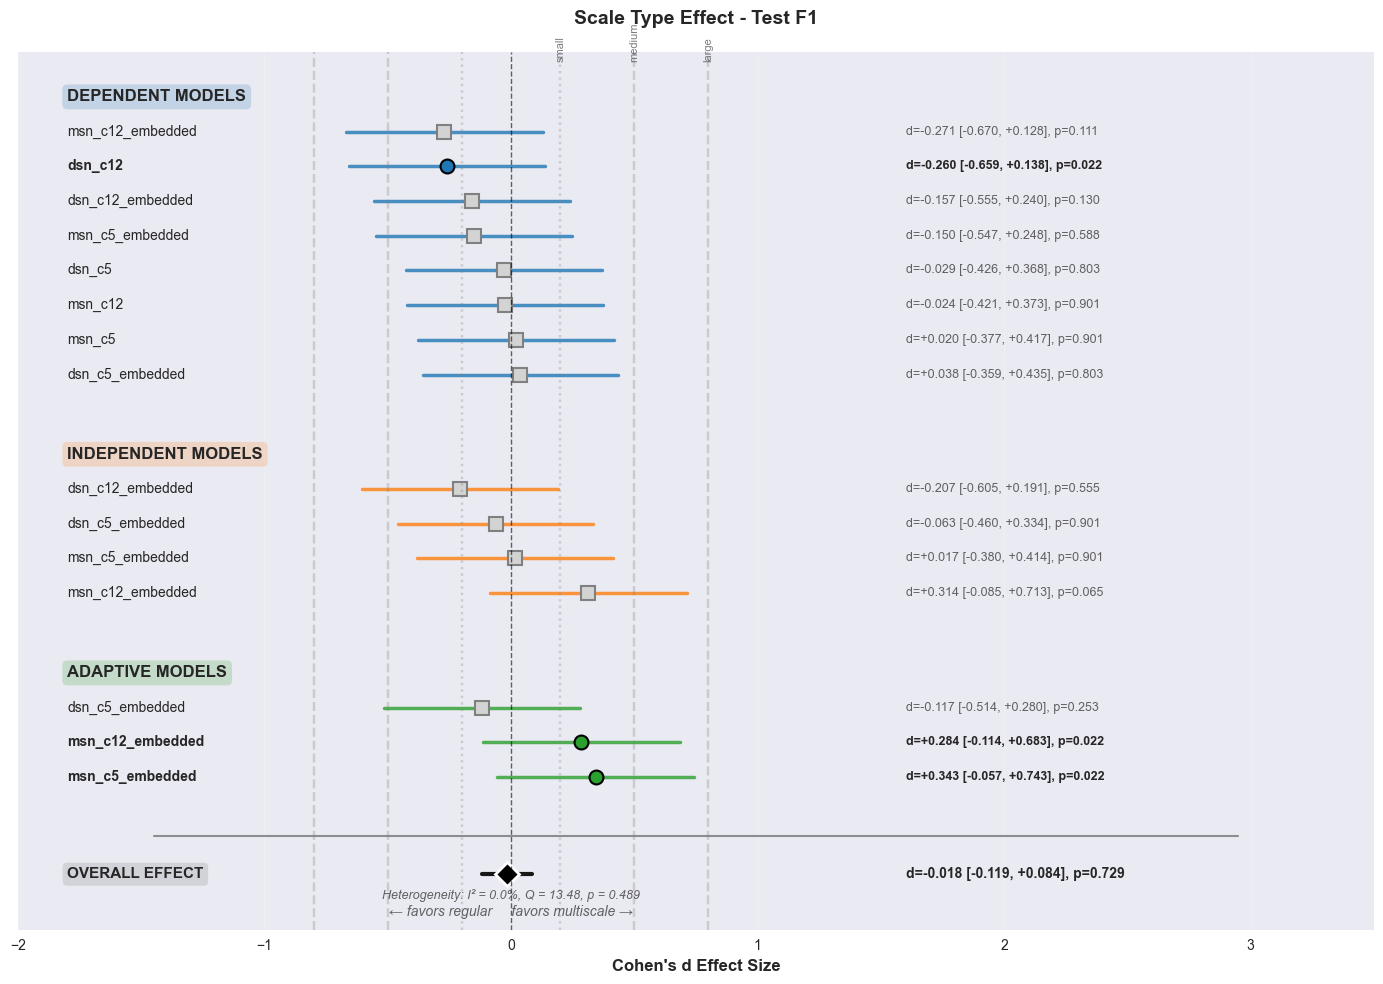

   📊 Creating encoding - test_bal_acc_all plot...
Enhanced forest plot saved to: ./enhanced_plots//enhanced_forest_encoding_test_bal_acc_all.png


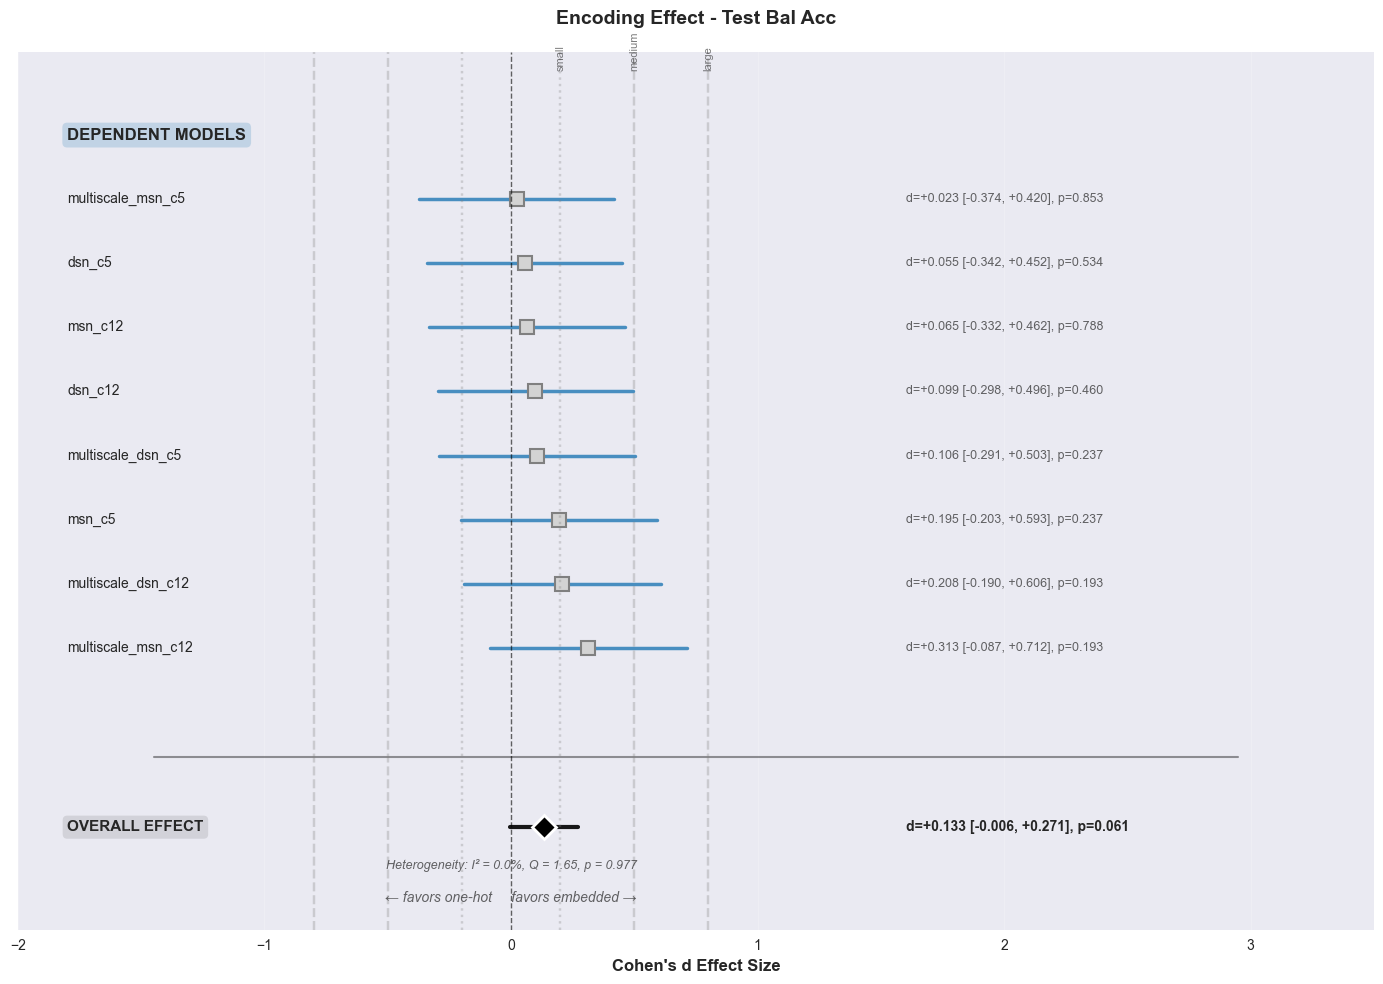

   📊 Creating encoding - test_f1_all plot...
Enhanced forest plot saved to: ./enhanced_plots//enhanced_forest_encoding_test_f1_all.png


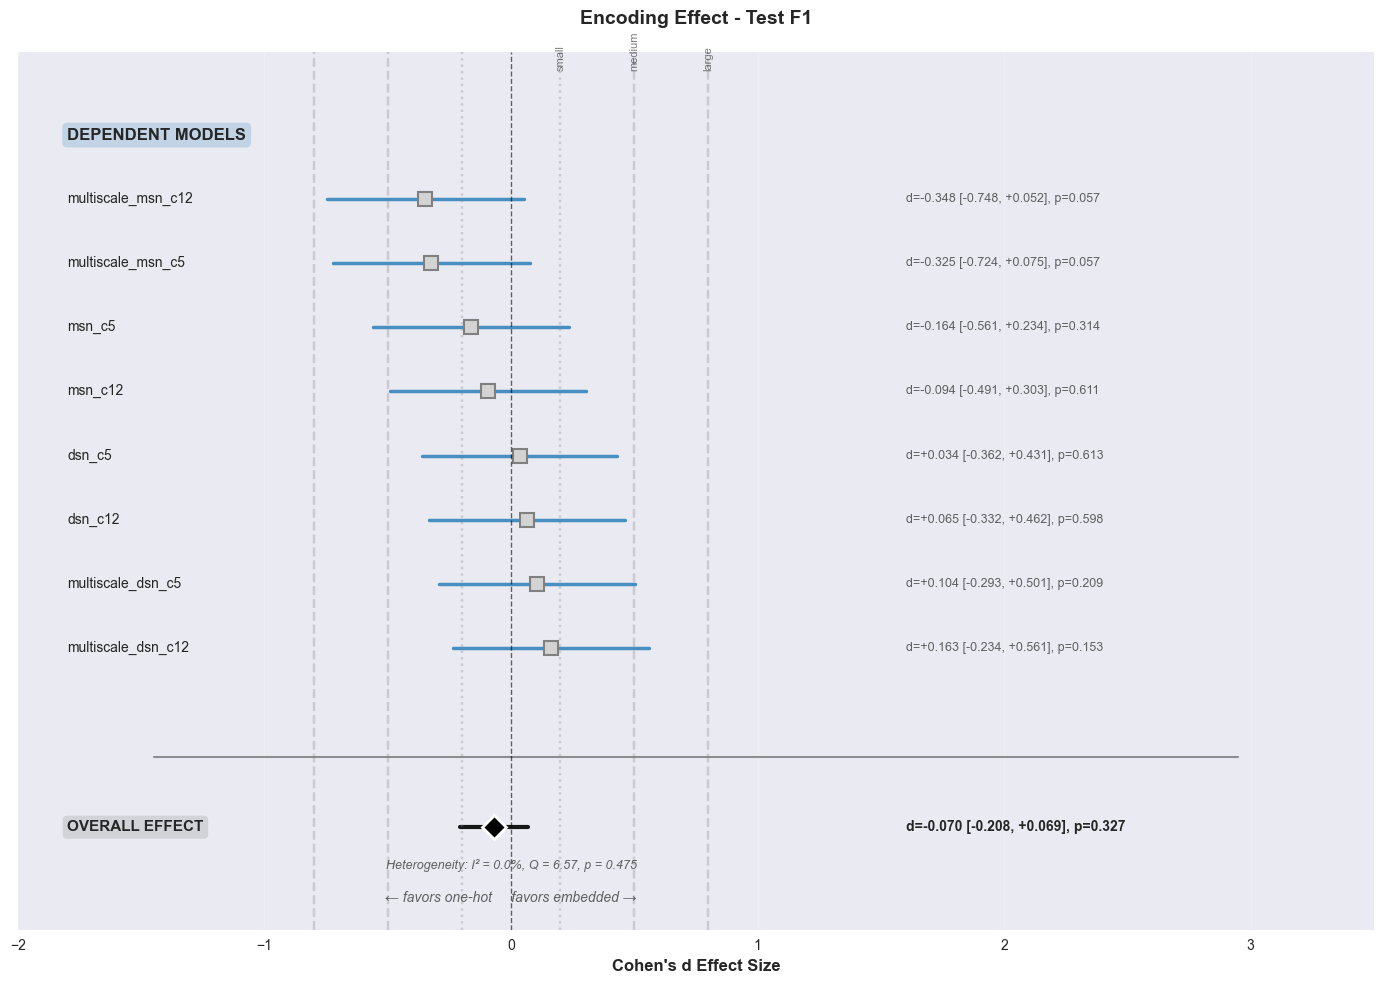

✅ All enhanced forest plots saved to: ./enhanced_plots/


In [26]:
plot_all_enhanced_forest_plots(proper_analysis)